# Import

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

/tmp/ipykernel_1859/3328326408.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def plot_column(ax, column, df):
    if df[column].dtype == 'object':
        # Check if binary
        if df[column].nunique() == 2:
            # Binary data visualization
            df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            # Categorical data visualization
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numeric data visualization
        df[column].plot(kind='hist', bins=20, ax=ax)
    else:
        ax.text(0.5, 0.5, f"Unhandled data type for column: {column}", 
                fontsize=12, ha='center')
    ax.set_title(column)


In [3]:
def plot_column_data(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    # Get the data type of the column
    data_type = df[column_name].dtype
    
    # Plot the data based on the data type
    if data_type == 'int64' or data_type == 'float64':
        # Plot numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    elif data_type == 'object':
        # Plot categorical data
        value_counts = df[column_name].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar plot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Data type '{data_type}' not supported for plotting.")

In [4]:
def read_files_in_directory(directory):

    file_paths = []
    for root, _, files in os.walk(directory):

        for file in files:
            if file[-3:] != "txt":
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
directory_path = "data/geneReadTest/"
files = read_files_in_directory(directory_path)

In [5]:
HS = ["ALDOA", "ANGPTL4" , "ANLN" , "BNC1" , 'C20orf20' , 'CA9' , 
      'CDKN3' , 'COL4A6' , 'DCBLD1' , 'ENO1' , 'FAM83B', 'FOSL1' , 
      'GNAI1' , 'HIG2' , 'KCTD11' , 'KRT17' , 'LDHA' , 'MPRS17' , 
      "P4HA1" 	, 'PGAM1' 	, 'PGK1' 	, 'SDC1' 	, 'SLC16A1' , 
      'SLC2A1', 'TPI1' 	, 'VEGFA']

IS = ["HLA-DQA1", "HLA-DQA2", "HLA-DRB5", "CTLA4", "PDCD1LG2", 
      'ICAM1', 'CD274', 'STAT1', 'IRF1', 'IFNG', 'GNLY', "TBX21", 
      "CCL5", "LAG3", "CD247", 'ICOS', 'IL18RAP', "CXCL9", "CXCL10", 
      "HLA-DPB1", 'HLA-DPA1', "HLA-DMB", 'HLA-DRA', 'HLA-DMA', 'CD80', 
      "HLA-DOA", "CD4"]
hypooxia_immue_signature = HS + IS

In [6]:
len(hypooxia_immue_signature)

53

In [7]:
def extract_hypooxia_immue_signature(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    filtered_df = df[df['gene_name'].isin(hypooxia_immue_signature)]
    gene_in_data = set(df['gene_name'])
    not_detected = set(hypooxia_immue_signature) - gene_in_data
    return filtered_df, not_detected

In [8]:
for file in files:
    df, not_detected = extract_hypooxia_immue_signature(file)
    print(not_detected)

{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}


# Gene
| case_ID | gene_1 | gene_2 | .... | 
##### Case Id to be matched


In [9]:
def extract_tpm(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    subset_df = df.iloc[4:, df.columns.isin(['tpm_unstranded', 'gene_id', 'gene_name'])]
    subset_df['header'] = subset_df['gene_id'] + '_' + subset_df['gene_name'] # Same genes, different id. multiple record
    transposed_df = subset_df[['header', 'tpm_unstranded']].T
    transposed_df.columns = transposed_df.loc['header']
    transposed_df = transposed_df.drop('header').reset_index(drop=True).sort_index(axis=1)
    return transposed_df

In [10]:
def merge_cases(files,extractor):
    merged = extractor(files[0])
    for file in files[1:]:
        to_be_merge = extractor(file)
        merged = pd.concat([to_be_merge, merged], axis=0, ignore_index=True)
    return merged
    

In [11]:
merge_gene_read = merge_cases(files,extract_tpm)


# Protein
| case_ID | protein_1 | protein_2 | .... |

In [12]:
directory_path = "../data/Protein_Expression"
files = read_files_in_directory(directory_path)

In [13]:
def get_case_id_from_filename(file):
    index = file.find("TCGA")
    return file[index:index+12]

In [14]:
def extract_protein_expression(file):
    df = pd.read_csv(file, sep='\t')
    subset_df = df[['protein_expression', 'AGID']]
    transposed_df = subset_df.set_index('AGID').T
    transposed_df = transposed_df.reset_index(drop=True)
    transposed_df.insert(0, 'case_submitter_id', [get_case_id_from_filename(file)])
    return transposed_df

In [15]:
merged_protein_expression = pd.read_csv('merged_protein_expression.csv')
merged_protein_expression.shape

(353, 488)

In [16]:
def calculate_column_statistics(df):
    results = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'NumUniqueValues', 'NumNaNs'])
    for column in df.columns:
        if column not in ["case_submitter_id"]:
            results.at[column, 'Mean'] = df[column].mean()
            results.at[column, 'Variance'] = df[column].var()
            results.at[column, 'NumUniqueValues'] = df[column].nunique()
            results.at[column, 'NumNaNs'] = df[column].isna().sum()
    return results

In [17]:
pd.set_option('display.max_rows', 500)

In [18]:
statistics= calculate_column_statistics(merged_protein_expression)


In [19]:
def extract_rows_by_nan(df, nan_threshold=353):
    columns = [column for column in df.columns if df[column].isna().sum() == nan_threshold]
    return columns

In [20]:
statistics= calculate_column_statistics(merged_protein_expression)
statistics["NumNaNs"].unique()

array([nan, 0, 10, 353, 141, 280], dtype=object)

353 means the protein is missing in all cases, drop

In [21]:
empmpty_columns = extract_rows_by_nan(merged_protein_expression,353)
merged_protein_expression = merged_protein_expression.drop(columns=empmpty_columns)
merged_protein_expression.shape

(353, 470)

488-470 = 18: 18 protein is removed since they are empty

In [22]:
full_columns = extract_rows_by_nan(merged_protein_expression,0)
merged_protein_expression[full_columns].shape

(353, 218)

218/488 protein recorded in all 353 cases

In [23]:
def extract_rows_with_nan(df, columns):
    return df[df[columns].isnull().any(axis=1)]

In [24]:
columns_missing_10 = extract_rows_by_nan(merged_protein_expression,10)
merged_protein_expression[columns_missing_10].isna().any(axis=1).sum()

10

In [25]:
missing_rows=extract_rows_with_nan(merged_protein_expression,columns_missing_10)[["case_submitter_id"]+columns_missing_10]

Above 10 cases contains 240 missing values, too much missing and only 10, drop?

In [26]:
merged_protein_expression = merged_protein_expression.drop(missing_rows.index)
merged_protein_expression.shape

(343, 470)

In [27]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141, 270], dtype=object)

1 columns missing in 280 cases now 270

In [28]:
columns = extract_rows_by_nan(merged_protein_expression,270)
column = merged_protein_expression[columns]
calculate_column_statistics(column)

Mean  Variance NumUniqueValues NumNaNs
AGID00332  0.753015  1.012533              73     270

In [29]:
merged_protein_expression = merged_protein_expression.drop(["AGID00332"],axis=1)
merged_protein_expression.shape


(343, 469)

In [30]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141], dtype=object)

In [31]:
columns = extract_rows_by_nan(merged_protein_expression,141)
merged_protein_expression[columns].shape


(343, 12)

12 columns 141 missing values, imputation?
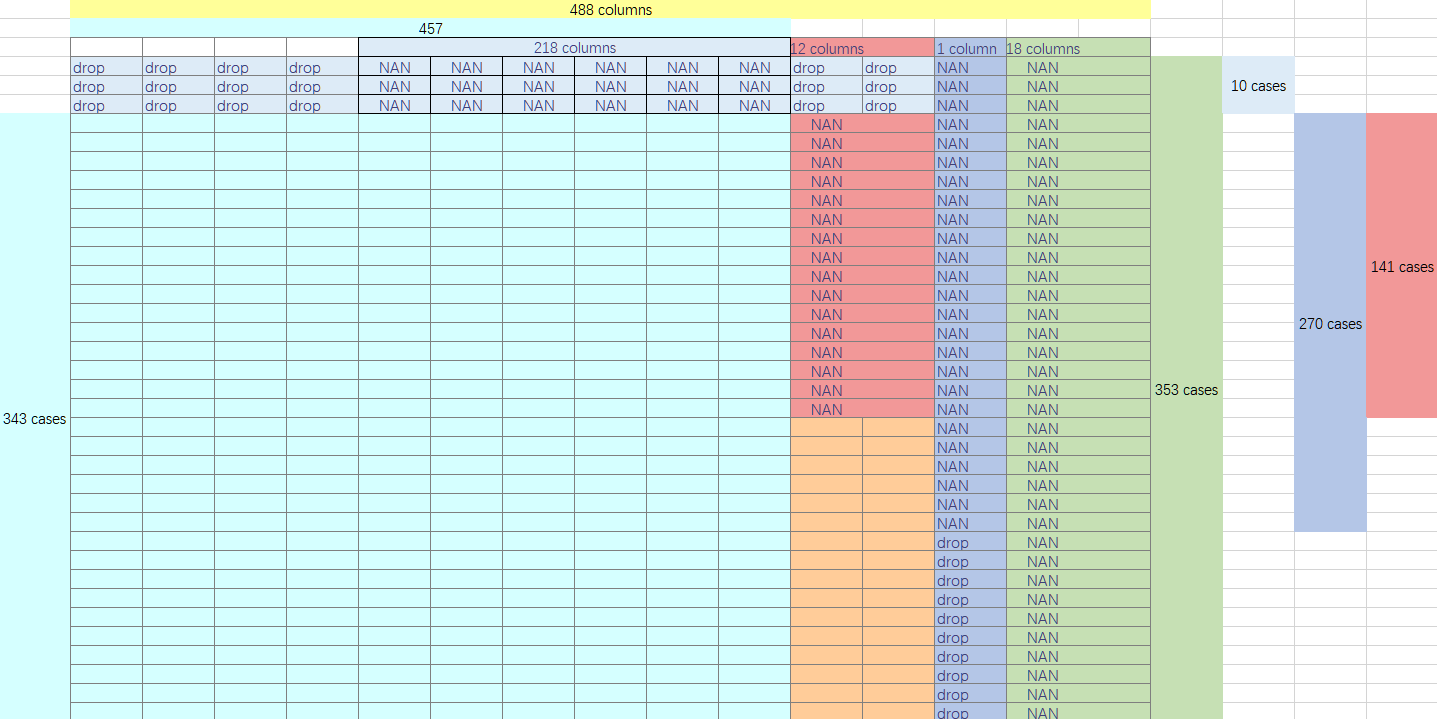

In [32]:
path = "data/clinical/clinical.tsv"
df = pd.read_csv(path,sep='\t')

In [33]:
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')

In [34]:
colums = ["case_submitter_id", "days_to_death", "days_to_last_follow_up","ajcc_pathologic_stage"]
deduplicate = df[df.index %2 !=0].sort_values(by='case_submitter_id')

In [35]:
merged_df_no_inputation = pd.merge(merged_protein_expression, deduplicate[["ajcc_pathologic_stage","vital_status","days_to_death","days_to_last_follow_up","case_submitter_id"]], on='case_submitter_id', how='inner')
merged_df_no_inputation["ajcc_pathologic_stage"].unique()

array(['Stage IVA', "'--", 'Stage II', 'Stage III', 'Stage I',
       'Stage IVB'], dtype=object)

In [36]:
def encode_stage_column(df, column_name):
    # Define mapping dictionary
    stage_mapping = {
        "Stage I": 0,
        "Stage II": 1,
        "Stage III": 2,
        "Stage IVA": 3,
        "Stage IVB": 4,
        "'--": -1
            }
    
    # Apply mapping to the column
    df[column_name] = df[column_name].map(stage_mapping)
    
    return df

In [37]:
merged_df_no_inputation = encode_stage_column(merged_df_no_inputation,"ajcc_pathologic_stage")

If ajcc_pathologic_stage is none plus the columns are null, no information on what median to map to, drop
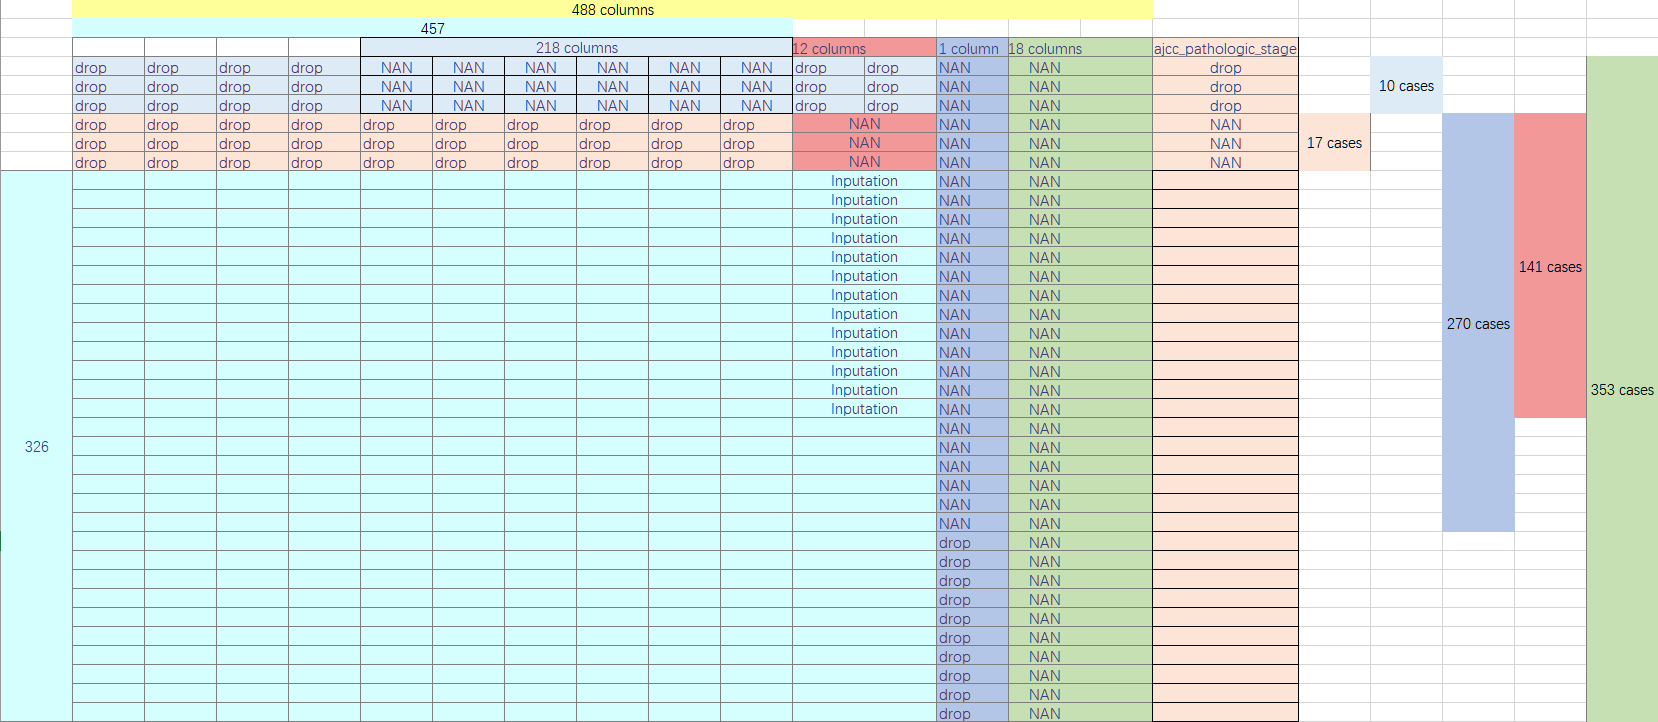

In [38]:
merged_df_no_inputation.shape

(343, 473)

In [39]:
def drop_rows(df, columns_to_check):
    all_nan = df[columns_to_check].isnull().all(axis=1)
    stage_minus_one = df["ajcc_pathologic_stage"] == -1
    to_drop = all_nan & stage_minus_one
    df = df[~to_drop]
    return df
merged_df_no_inputation = drop_rows(merged_df_no_inputation,columns)

In [40]:
merged_df_no_inputation.shape

(326, 473)

In [41]:
def impute_missing_with_group_median(merged_df_no_inputation, reference_column, columns_to_impute):

    for col in columns_to_impute:

        median_values = merged_df_no_inputation.groupby(reference_column)[col].median()

        for index, row in merged_df_no_inputation[merged_df_no_inputation[col].isnull()].iterrows():

            
            label_value = row[reference_column]

            merged_df_no_inputation.at[index, col] = median_values[label_value]
    return merged_df_no_inputation

In [42]:
merged_df = impute_missing_with_group_median(merged_df_no_inputation,"ajcc_pathologic_stage",columns)

In [43]:
def contain_nan(df,col):
    if df[col].isna().any():
        return True
    return False

In [44]:
for col in columns:
    print(contain_nan(merged_df,col))

False
False
False
False
False
False
False
False
False
False
False
False


If vital_status is alive but do days_to_last_follow_up record or dead but no days to death record, drop

In [45]:
contain_nan(merged_df,"vital_status")

False

In [46]:
# Drop rows where 'vital_status' is 'Dead' and 'days_to_death' is NaN

merged_df = merged_df.drop(merged_df[(merged_df['vital_status'] == 'Alive') & (merged_df['days_to_last_follow_up'].isna())].index)
merged_df = merged_df.drop(merged_df[(merged_df['vital_status'] == 'Dead') & (merged_df['days_to_death'].isna())].index)


In [47]:
merged_df.shape

(324, 473)

Assuming alive to be the same class as days_to_death > 10 years, although it may not always be the case. Therefore not merge days to last follow up and days to death to OS. 

In [48]:
merged_df[(merged_df['vital_status'] == 'Alive')]["days_to_last_follow_up"].describe()

count     165.000000
mean     1117.593939
std       943.529291
min        11.000000
25%       520.000000
50%       773.000000
75%      1483.000000
max      5480.000000
Name: days_to_last_follow_up, dtype: float64

# Load data


In [49]:
# merged_df.to_csv('protein_expression.csv',index=False)


In [50]:
merged_df = pd.read_csv('protein_expression.csv')
inputed_columns = ['AGID00215',
 'AGID00537',
 'AGID00536',
 'AGID00211',
 'AGID00485',
 'AGID00383',
 'AGID00216',
 'AGID00257',
 'AGID00545',
 'AGID00413',
 'AGID00547',
 'AGID00144']

AE

In [51]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ModelCheckpoint


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC

2024-03-19 02:33:23.883509: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 02:33:25.688677: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 02:33:29.446113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 02:33:33.469456: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [52]:
protein_columns = merged_df.columns.drop(["ajcc_pathologic_stage","vital_status","days_to_death","days_to_last_follow_up","case_submitter_id"])
protein_columns

Index(['AGID00100', 'AGID00111', 'AGID00101', 'AGID00001', 'AGID00002',
       'AGID00003', 'AGID00443', 'AGID00120', 'AGID00004', 'AGID00005',
       ...
       'AGID00349', 'AGID02137', 'AGID00088', 'AGID00089', 'AGID00504',
       'AGID00095', 'AGID02217', 'AGID02210', 'AGID00326', 'AGID00432'],
      dtype='object', length=468)

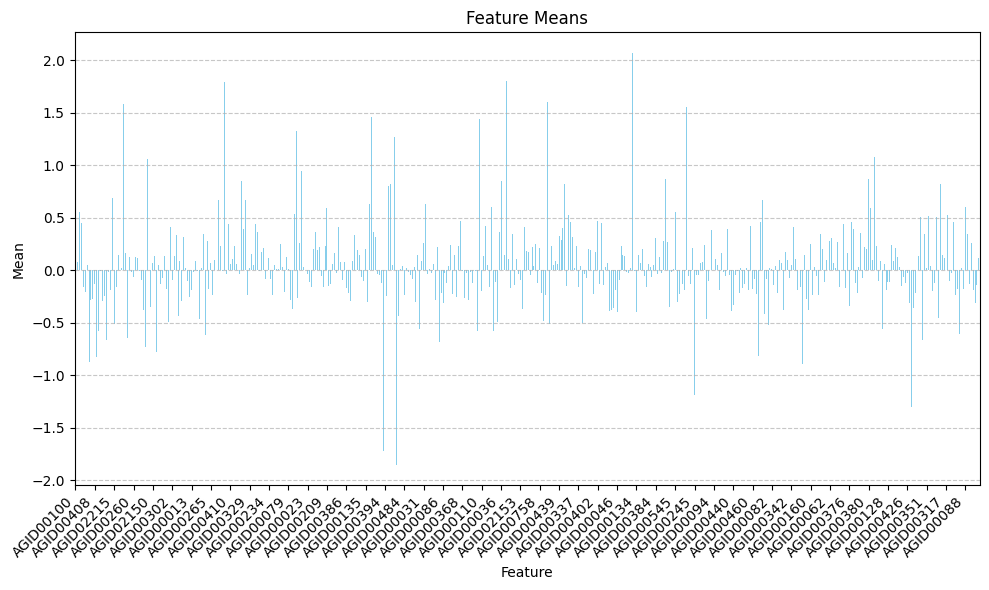

In [53]:
describe_df = merged_df[protein_columns].describe()
row_means = describe_df.loc['mean']

# Plot row means
plt.figure(figsize=(10, 6))
row_means.plot(kind='bar', color='skyblue')
plt.title('Feature Means')
plt.xlabel('Feature')
plt.ylabel('Mean')

plt.xticks(range(0, len(row_means), 10), row_means.index[::10], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

In [54]:
merged_df = merged_df.drop(["ajcc_pathologic_stage","vital_status","days_to_last_follow_up","case_submitter_id"], axis=1)
other = merged_df.columns.drop("days_to_death")

scaler = MinMaxScaler()
merged_df[other] = scaler.fit_transform(merged_df[other])

X_train, X_test, y_train, y_test = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [55]:
merged_df_no_inputation = merged_df.drop(inputed_columns, axis=1)
other = merged_df_no_inputation.columns.drop("days_to_death")

X_test_no_inputation, X_train_no_inputation, y_test_no_inputation, y_train_no_inputation= train_test_split(merged_df_no_inputation[other], merged_df_no_inputation["days_to_death"],
                                                    test_size=0.75,
                                                    random_state=1)

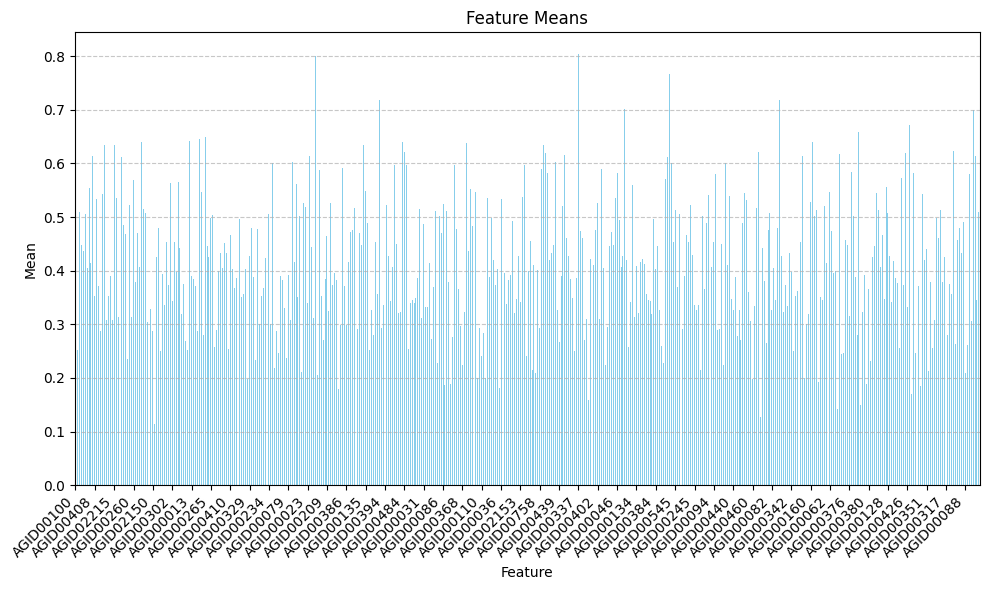

In [56]:
describe_df = X_train.describe()
row_means = describe_df.loc['mean']

# Plot row means
plt.figure(figsize=(10, 6))
row_means.plot(kind='bar', color='skyblue')
plt.title('Feature Means')
plt.xlabel('Feature')
plt.ylabel('Mean')

plt.xticks(range(0, len(row_means), 10), row_means.index[::10], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

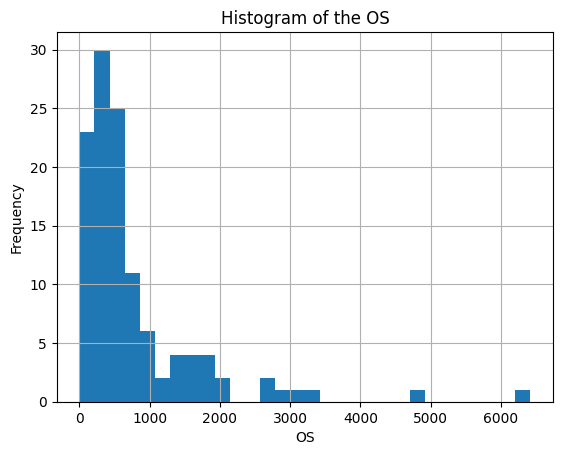

In [57]:
y_train.hist(bins=30) 
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.title('Histogram of the OS')
plt.show()

survice timespan: 
1. 0-1
2. 1-3
3. 3-5
4. 5-10
5. 10-20
6. >20 /alive

## AE class

In [58]:
class AE():
    def __init__(self,X_train,X_test,y_train,y_test,bottleneck,type):
        self.X_train = X_train
        self.X_test = X_test        
        self.y_train = y_train
        self.y_test = y_test
        self.bottleneck = bottleneck
        self.history = None
        self.encoder = None
        self.autoencoder = None
        self.type = type
        self.classifer = None

    def train(self):
    # Number of features in your dataset
        n_features = len(self.X_train.columns) 


        input_layer = Input(shape=(n_features,))
        encoder = Dense(64, activation='relu')(input_layer)
        encoder = Dense(32, activation='relu')(encoder)


        bottleneck = Dense(self.bottleneck, activation='relu')(encoder)  

        # Define the decoder (mirror the encoder)
        decoder = Dense(32, activation='relu')(bottleneck)
        decoder = Dense(64, activation='relu')(decoder)
        self.encoder= Model(inputs=input_layer, outputs=bottleneck)

        # Output layer
        output_layer = Dense(n_features, activation='sigmoid')(decoder) 

        # Define the autoencoder model
        self.autoencoder = Model(inputs=input_layer, outputs=output_layer)

        # Compile the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')

        self.checkpoint = ModelCheckpoint(f'model/{self.type}_best_model.keras', 
                             monitor='val_loss', 
                             verbose=1,           
                             save_best_only=True, 
                             mode='min')         

        self.history = self.autoencoder.fit(self.X_train, self.X_train,
                epochs=100,
                batch_size=8,
                shuffle=True,
                validation_data=(self.X_test, self.X_test),
                callbacks=[self.checkpoint])  
        
        self.encode()
        self.map_y()

    def plot(self):
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss '+ self.type)
        plt.legend()
        plt.show()

    def encode(self):
        self.autoencoder.load_weights(f'model/{self.type}_best_model.keras')
        self.encoded_X_train = self.encoder.predict(self.X_train)
        self.encoded_X_test = self.encoder.predict(self.X_test)
    
    def do_PCA(self,n_components):
        if self.bottleneck == 2:
            # pca = PCA(n_components=n_components)
            # reduced_data = pca.fit_transform(self.encoded_X_test)
            x = self.encoded_X_test[:, 0]
            y = self.encoded_X_test[:, 1]
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(x, y, c=self.y_test_in_bin, cmap='viridis', alpha=0.7)
            plt.title('Encoded Data '+self.type)
            plt.xlabel('Encoded Dim 0')
            plt.ylabel('Encoded Dim 1')
            plt.colorbar(scatter, label='OS')
            plt.grid(True)
            plt.show()
            return
        if n_components ==2:
            pca = PCA(n_components=n_components)
            reduced_data = pca.fit_transform(self.encoded_X_test)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(x, y, c=self.y_test_in_bin, cmap='viridis', alpha=0.7)
            plt.title('PCA of Encoded Data '+self.type)
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.colorbar(scatter, label='OS')
            plt.grid(True)
            plt.show()
        elif n_components ==3:
            pca = PCA(n_components=3)  # Reduce to 3 dimensions
            reduced_data = pca.fit_transform(self.encoded_X_test)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            z = reduced_data[:, 2]
            fig =plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(x, y, z, c=self.y_test_in_bin, cmap='viridis', depthshade=True)
            ax.set_title('3D PCA of Encoded Data '+self.type)
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_zlabel('Principal Component 3')
            plt.colorbar(scatter, label='OS')
            plt.show()

    @staticmethod
    def map_years_to_group(value):
        years = value / 365
        if years <= 1:
            return 0
        elif 1 < years <= 3:
            return 1
        elif 3 < years <= 5:
            return 2
        elif 5 < years <= 10:
            return 3
        elif 10 < years <= 20:
            return 4
        else:  
            return 5
        
    @staticmethod        
    def map_to_binary(category):
        if category >= 4:
            return 1
        else:  
            return 0
        
    def map_y(self):
        self.y_trian_in_category = self.y_train.map(AE.map_years_to_group)
        self.y_test_in_category = self.y_test.map(AE.map_years_to_group)        
        
        self.y_trian_in_bin = self.y_trian_in_category.map(AE.map_to_binary)
        self.y_test_in_bin = self.y_test_in_category.map(AE.map_to_binary)

    def do_RF(self,binary):
        clf = RandomForestClassifier(n_estimators=100, random_state=0)

        if binary:
            clf.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))

        else:
            clf.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('RF Confusion Matrix '+self.type)
        plt.show()
        self.classifer = clf

    def do_Kmean(self):
        # Number of clusters - assuming you want as many as your known classes
        num_clusters = 2
        # Perform K-means clustering on the PCA output
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(self.encoded_X_test)  # Use your 2D or 3D PCA-reduced data here


        print("Classification Report:")
        print(classification_report(self.y_test_in_bin, cluster_labels))
        conf_mat = confusion_matrix(self.y_test_in_bin, cluster_labels)

        # Plotting the confusion matrix
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clusters), yticklabels=np.unique(self.y_test_in_bin))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('K-mean Confusion Matrix '+self.type)
        plt.show()
        self.classifer = kmeans

    def do_SVM(self,binary):
        svm_classifier = SVC(kernel='linear',random_state=0)
        # Load the best weights into the autoencoder model
        if binary:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()
        else:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))
        
            # Plotting the confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_category))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()
        self.classifer = svm_classifier


        


Epoch 1/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0433
Epoch 1: val_loss improved from inf to 0.02342, saving model to model/(569 proteins encode to 6)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0421 - val_loss: 0.0234
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0322
Epoch 2: val_loss improved from 0.02342 to 0.02145, saving model to model/(569 proteins encode to 6)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 - val_loss: 0.0214
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244
Epoch 3: val_loss improved from 0.02145 to 0.02112, saving model to model/(569 proteins encode to 6)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 - val_loss: 0.0211
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0207
Epoch 4: val_loss improved from 0.02112 to 0.01940, saving model to model/(569 proteins encode to 6)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

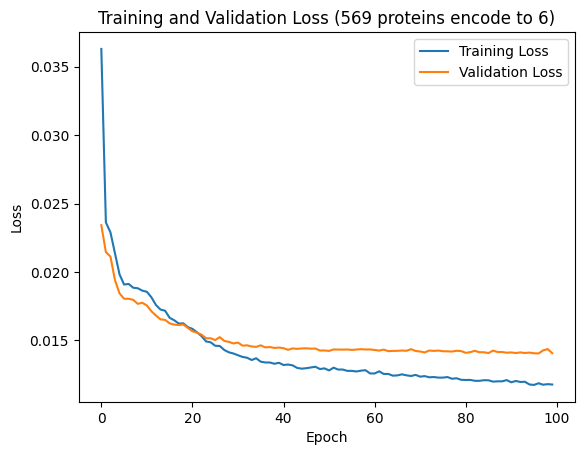

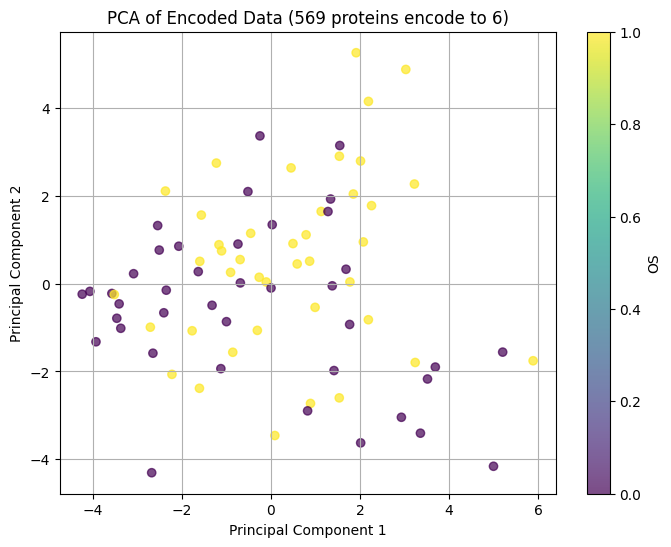

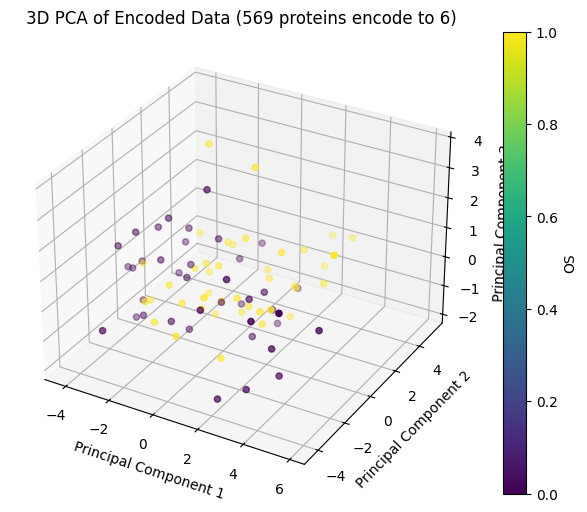

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        40
           1       0.56      0.54      0.55        41

    accuracy                           0.56        81
   macro avg       0.56      0.56      0.56        81
weighted avg       0.56      0.56      0.56        81



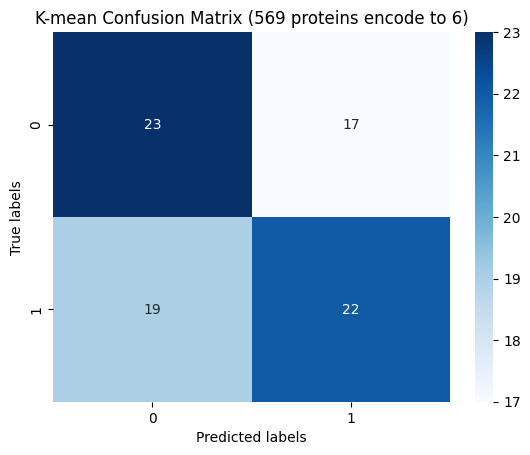

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        40
           1       0.46      0.39      0.42        41

    accuracy                           0.46        81
   macro avg       0.46      0.46      0.45        81
weighted avg       0.46      0.46      0.45        81



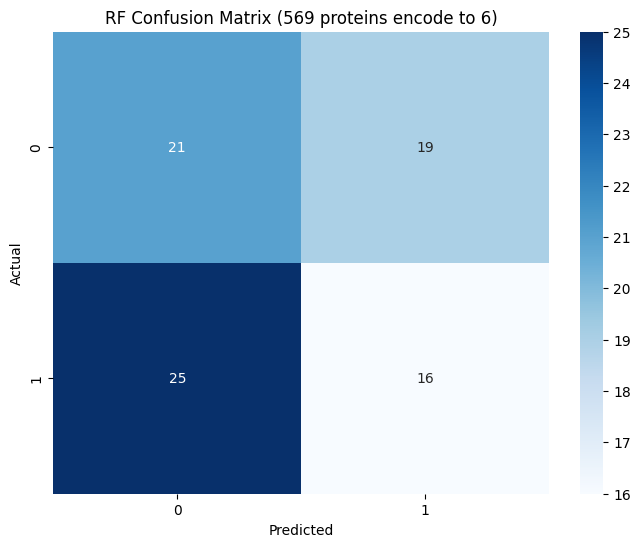

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        40
           1       0.58      0.68      0.63        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



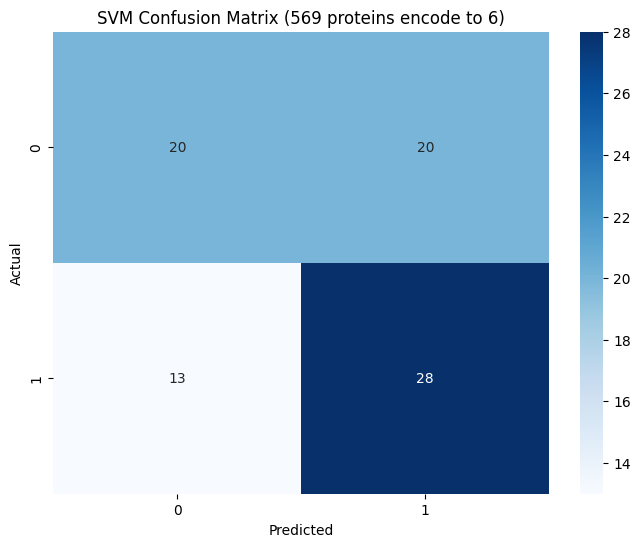

In [59]:
AE_inputation = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 6,type = "(569 proteins encode to 6)")
AE_inputation.train()
AE_inputation.plot()
AE_inputation.do_PCA(2)
AE_inputation.do_PCA(3)
AE_inputation.do_Kmean()
AE_inputation.do_RF(binary=True)
AE_inputation.do_SVM(binary=True)



In [60]:
# loaded_model = tf.keras.models.load_model("path/to/save/model.h5")
AE_inputation.autoencoder.save("model/AE_inputation_autoencoder.keras")
AE_inputation.encoder.save("model/AE_inputation_encoder.keras")


Not Ideal, switch to binary classification
1. AE to 6
2. AE to 2 dim

Epoch 1/100


 1/31 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.0499
Epoch 1: val_loss improved from inf to 0.02171, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - val_loss: 0.0217
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0332
Epoch 2: val_loss improved from 0.02171 to 0.02004, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0300
Epoch 3: val_loss improved from 0.02004 to 0.01762, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243 - val_loss: 0.0176
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0243
Epoch 4: val_loss improved from 0.01762 to 0.01692, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - val_loss: 0.0169
Epoch 5/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211
Epoch 5: val_loss improved

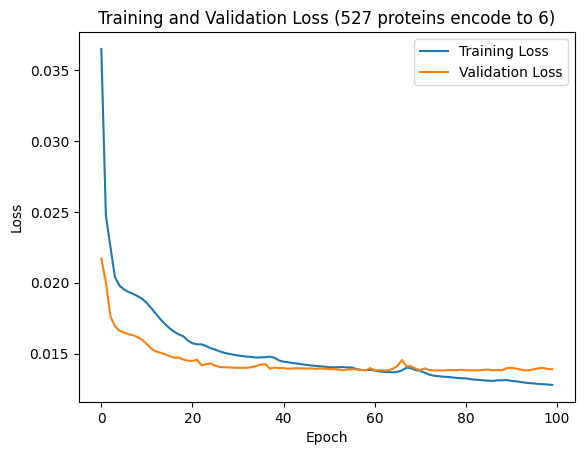

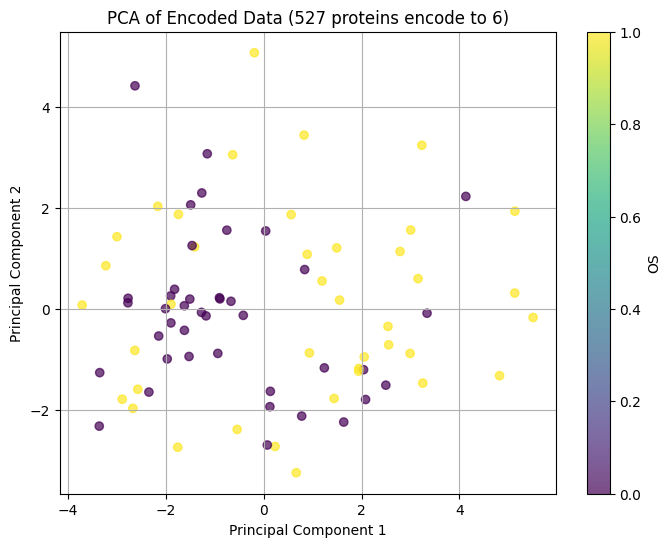

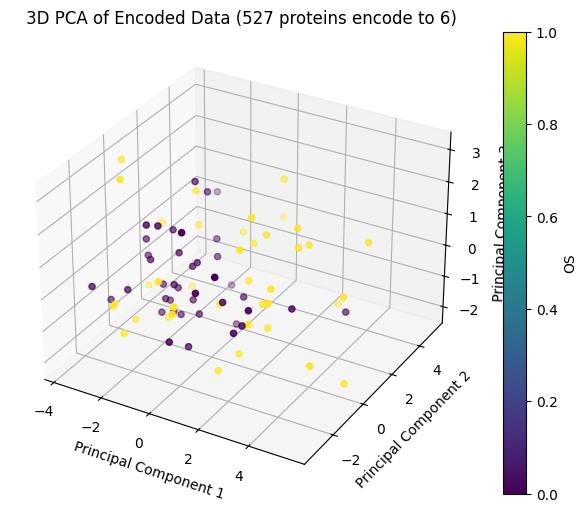

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.73      0.60      0.66        40

    accuracy                           0.69        81
   macro avg       0.70      0.69      0.69        81
weighted avg       0.70      0.69      0.69        81



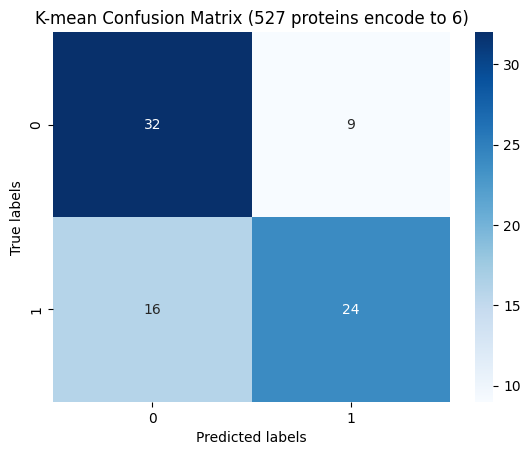

              precision    recall  f1-score   support

           0       0.52      0.56      0.54        41
           1       0.51      0.47      0.49        40

    accuracy                           0.52        81
   macro avg       0.52      0.52      0.52        81
weighted avg       0.52      0.52      0.52        81



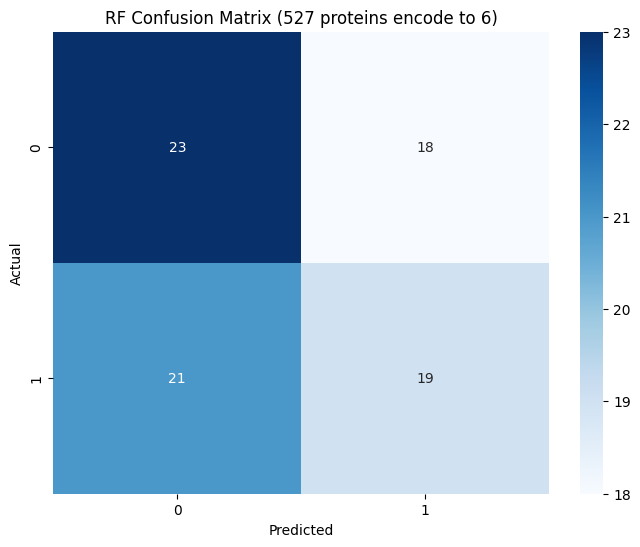

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        41
           1       0.50      0.50      0.50        40

    accuracy                           0.51        81
   macro avg       0.51      0.51      0.51        81
weighted avg       0.51      0.51      0.51        81



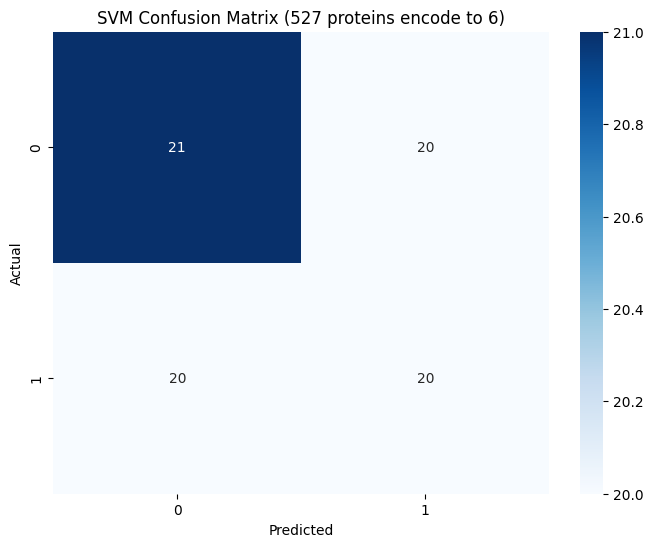

In [160]:
AE_no_inputation = AE(X_train=X_train_no_inputation,X_test=X_test_no_inputation,y_train=y_train_no_inputation,y_test=y_test_no_inputation,bottleneck = 6,type = "(527 proteins encode to 6)")
AE_no_inputation.train()
AE_no_inputation.plot()
AE_no_inputation.do_PCA(2)
AE_no_inputation.do_PCA(3)
AE_no_inputation.do_Kmean()
AE_no_inputation.do_RF(binary=True)
AE_no_inputation.do_SVM(binary=True)



In [161]:
AE_no_inputation.autoencoder.save("model/AE_no_inputation_autoencoder.keras")
AE_no_inputation.encoder.save("model/AE_no_inputation_encoder.keras")

Epoch 1/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0482
Epoch 1: val_loss improved from inf to 0.02447, saving model to model/(569 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0443 - val_loss: 0.0245
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233
Epoch 2: val_loss improved from 0.02447 to 0.02215, saving model to model/(569 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256 - val_loss: 0.0222
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263
Epoch 3: val_loss improved from 0.02215 to 0.02176, saving model to model/(569 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237 - val_loss: 0.0218
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0232
Epoch 4: val_loss improved from 0.02176 to 0.02157, saving model to model/(569 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

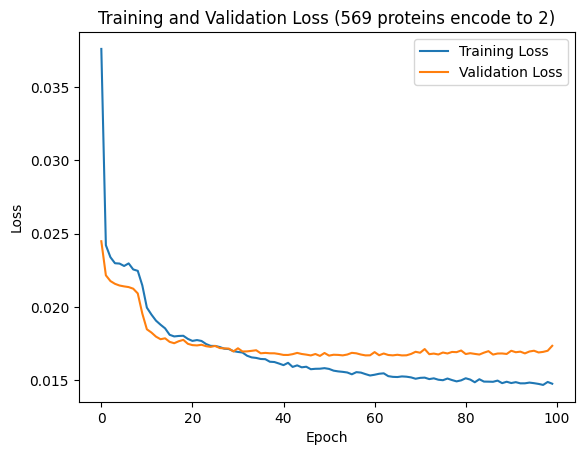

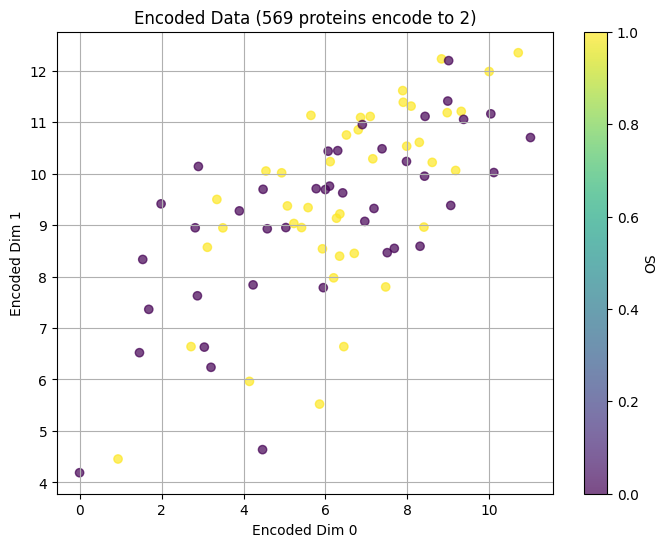

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.57      0.52        40
           1       0.48      0.39      0.43        41

    accuracy                           0.48        81
   macro avg       0.48      0.48      0.48        81
weighted avg       0.48      0.48      0.48        81



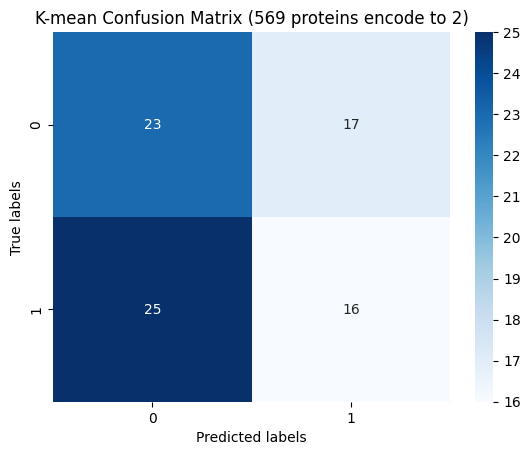

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        40
           1       0.55      0.66      0.60        41

    accuracy                           0.56        81
   macro avg       0.56      0.55      0.55        81
weighted avg       0.56      0.56      0.55        81



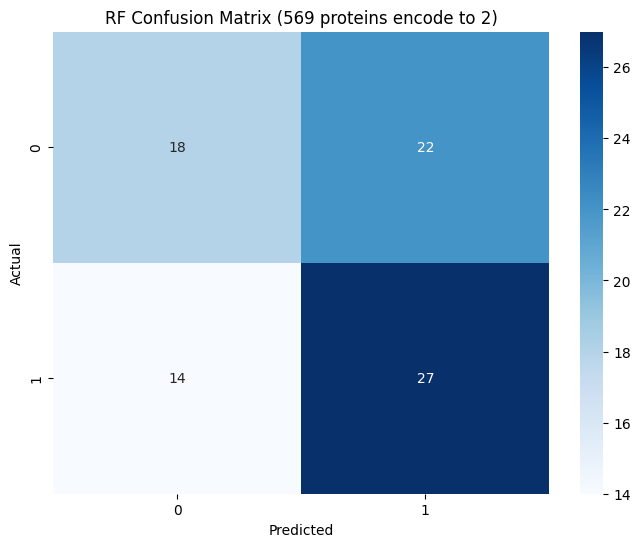

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.51      1.00      0.67        41

    accuracy                           0.51        81
   macro avg       0.25      0.50      0.34        81
weighted avg       0.26      0.51      0.34        81



/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


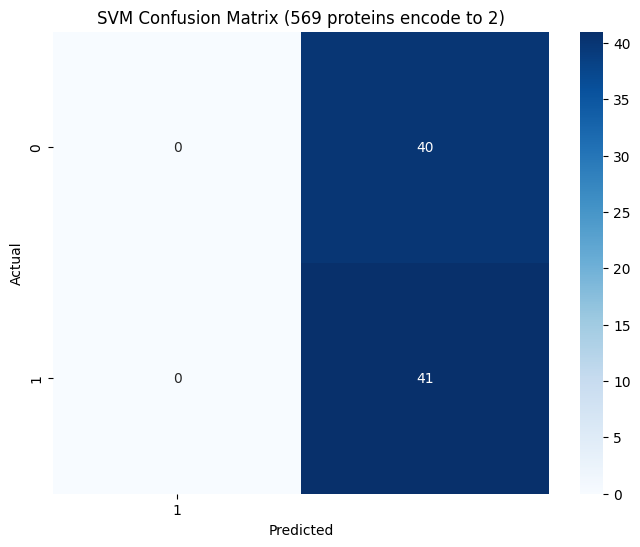

In [61]:
AE_inputation_2d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 2,type = "(569 proteins encode to 2)")
AE_inputation_2d.train()
AE_inputation_2d.plot()
AE_inputation_2d.do_PCA(2)
AE_inputation_2d.do_Kmean()
AE_inputation_2d.do_RF(binary=True)
AE_inputation_2d.do_SVM(binary=True)



In [163]:
AE_inputation_2d.autoencoder.save("model/AE_inputation_2d_autoencoder.keras")
AE_inputation_2d.encoder.save("model/AE_inputation_2d_encoder.keras")

Epoch 1/100


 1/31 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0429
Epoch 1: val_loss improved from inf to 0.02236, saving model to model/(557 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - val_loss: 0.0224
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220
Epoch 2: val_loss improved from 0.02236 to 0.02079, saving model to model/(557 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - val_loss: 0.0208
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0240
Epoch 3: val_loss improved from 0.02079 to 0.02055, saving model to model/(557 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239 - val_loss: 0.0206
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0195
Epoch 4: val_loss improved from 0.02055 to 0.02046, saving model to model/(557 proteins encode to 2)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0241 - va

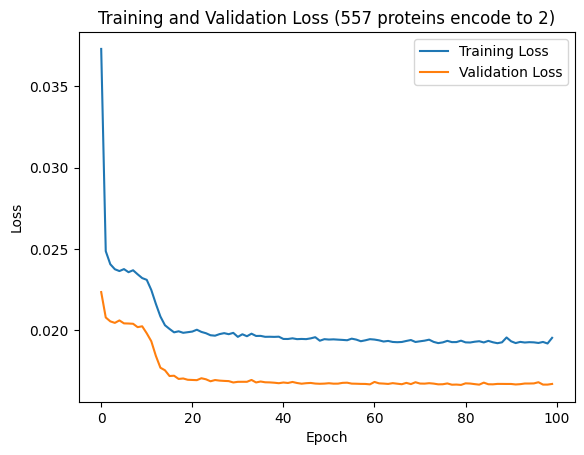

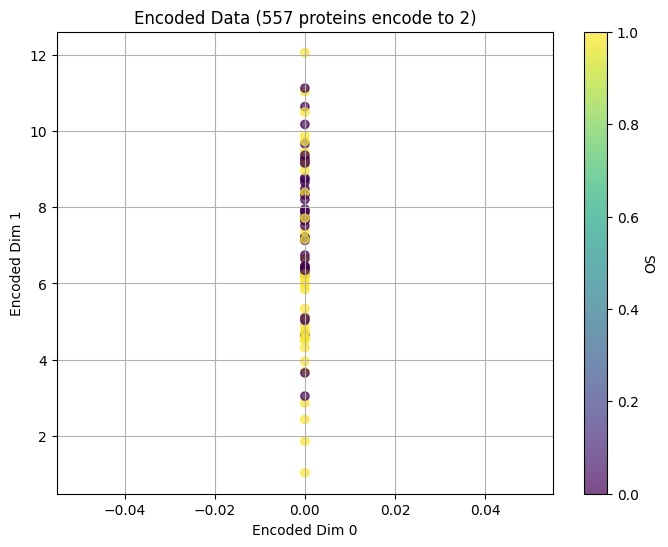

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.65      0.65      0.65        40

    accuracy                           0.65        81
   macro avg       0.65      0.65      0.65        81
weighted avg       0.65      0.65      0.65        81



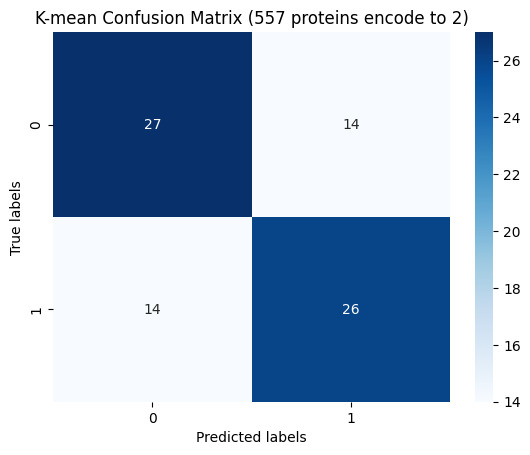

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        41
           1       0.53      0.53      0.53        40

    accuracy                           0.53        81
   macro avg       0.53      0.53      0.53        81
weighted avg       0.53      0.53      0.53        81



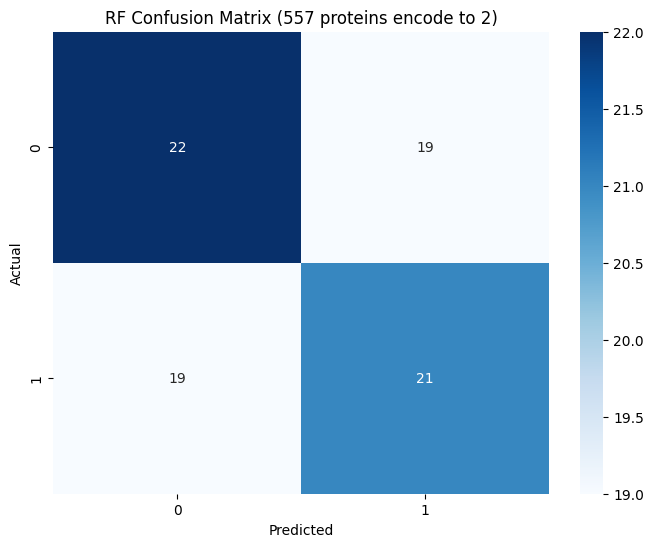

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.49      1.00      0.66        40

    accuracy                           0.49        81
   macro avg       0.25      0.50      0.33        81
weighted avg       0.24      0.49      0.33        81



/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


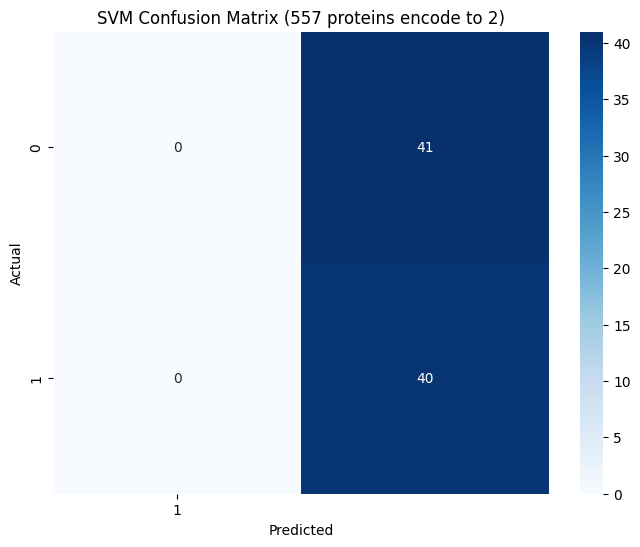

In [62]:
AE_no_inputation_2d = AE(X_train=X_train_no_inputation,X_test=X_test_no_inputation,y_train=y_train_no_inputation,y_test=y_test_no_inputation,bottleneck = 2,type = "(557 proteins encode to 2)")
AE_no_inputation_2d.train()
AE_no_inputation_2d.plot()
AE_no_inputation_2d.do_PCA(2)
AE_no_inputation_2d.do_Kmean()
AE_no_inputation_2d.do_RF(binary=True)
AE_no_inputation_2d.do_SVM(binary=True)



Epoch 1/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 29s 997ms/step - loss: 0.0466
Epoch 1: val_loss improved from inf to 0.02389, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0419 - val_loss: 0.0239
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0212
Epoch 2: val_loss improved from 0.02389 to 0.02163, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233 - val_loss: 0.0216
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0191
Epoch 3: val_loss improved from 0.02163 to 0.02031, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - val_loss: 0.0203
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182
Epoch 4: val_loss improved from 0.02031 to 0.01865, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 - val_loss: 0.0186
Epoch 5/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0173
Epoch 5: va

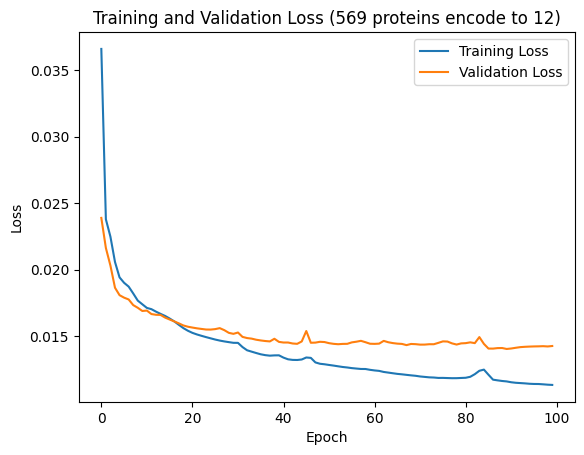

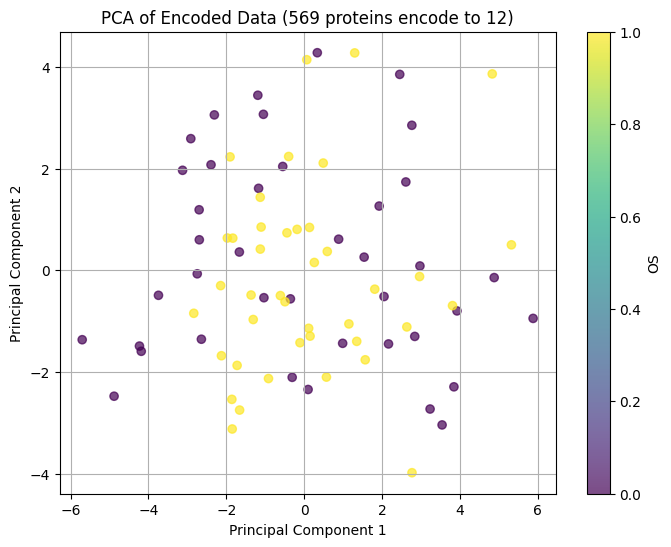

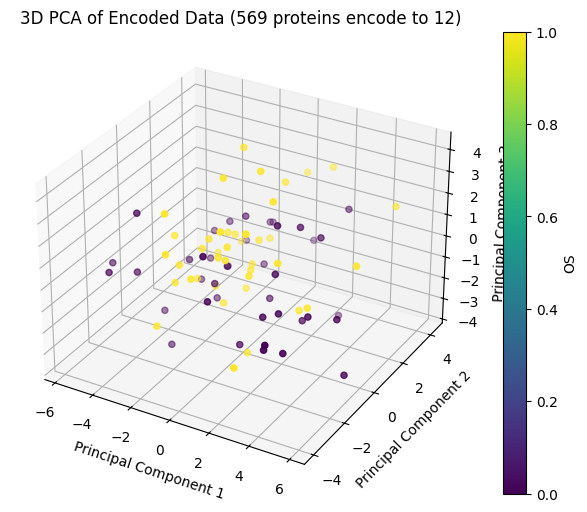

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        40
           1       0.39      0.27      0.32        41

    accuracy                           0.42        81
   macro avg       0.41      0.42      0.41        81
weighted avg       0.41      0.42      0.41        81



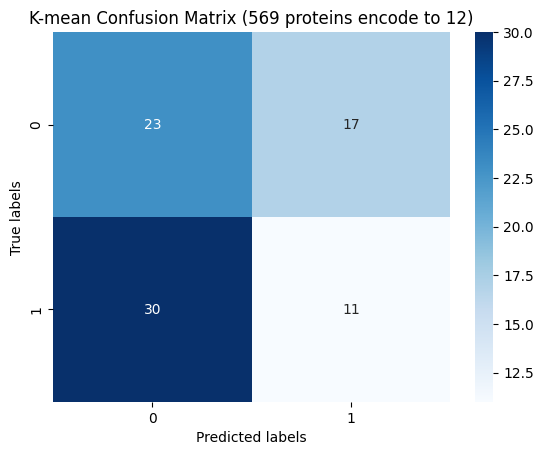

              precision    recall  f1-score   support

           0       0.49      0.45      0.47        40
           1       0.50      0.54      0.52        41

    accuracy                           0.49        81
   macro avg       0.49      0.49      0.49        81
weighted avg       0.49      0.49      0.49        81



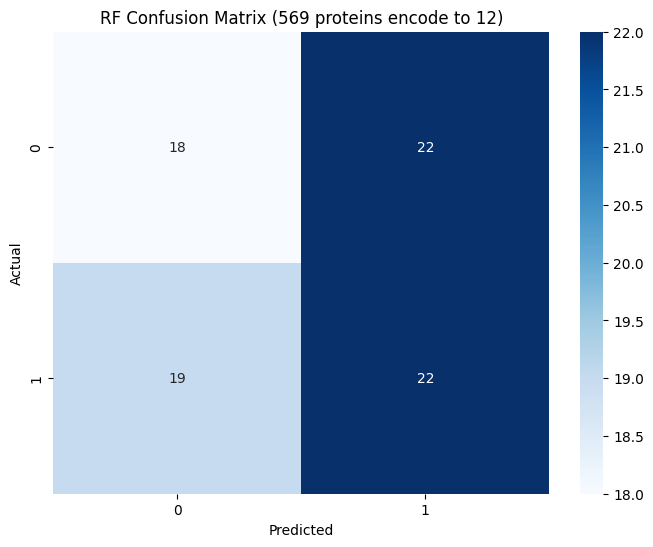

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        40
           1       0.60      0.61      0.60        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



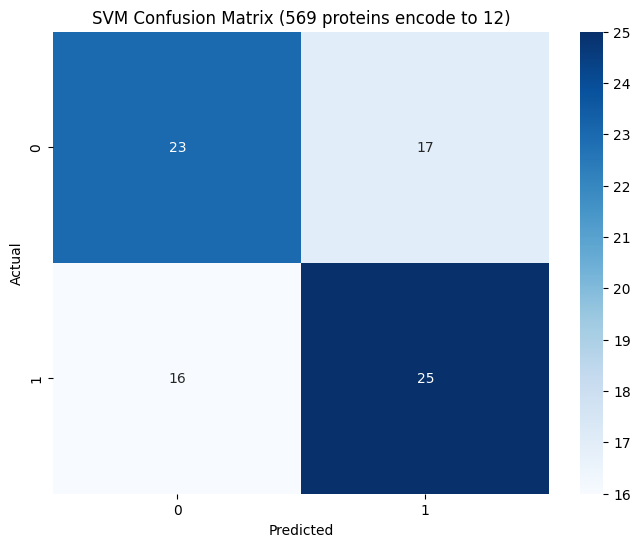

In [165]:
AE_inputation_12d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 12,type = "(569 proteins encode to 12)")
AE_inputation_12d.train()
AE_inputation_12d.plot()
AE_inputation_12d.do_PCA(2)
AE_inputation_12d.do_PCA(3)
AE_inputation_12d.do_Kmean()
AE_inputation_12d.do_RF(binary=True)
AE_inputation_12d.do_SVM(binary=True)



## Baseline: Exam on RAW

              precision    recall  f1-score   support

           0       0.57      0.60      0.59        40
           1       0.59      0.56      0.57        41

    accuracy                           0.58        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.58      0.58      0.58        81



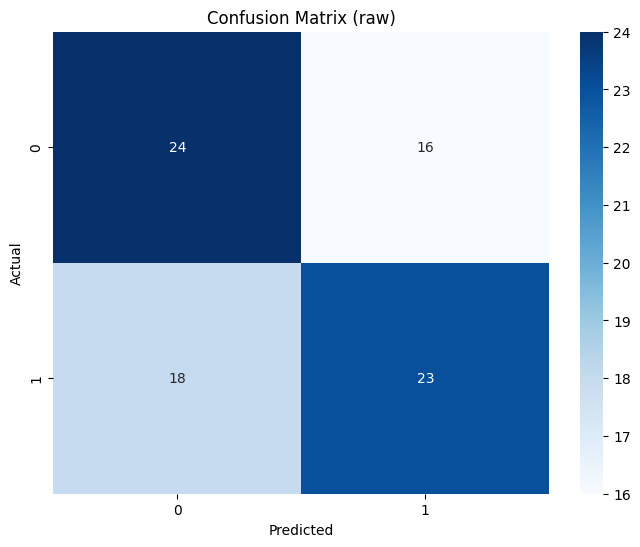

In [166]:
SVM_y_train = AE_inputation.y_trian_in_bin
SVM_y_test = AE_inputation.y_test_in_bin
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (raw)')
plt.show()


              precision    recall  f1-score   support

           0       0.61      0.50      0.55        40
           1       0.58      0.68      0.63        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



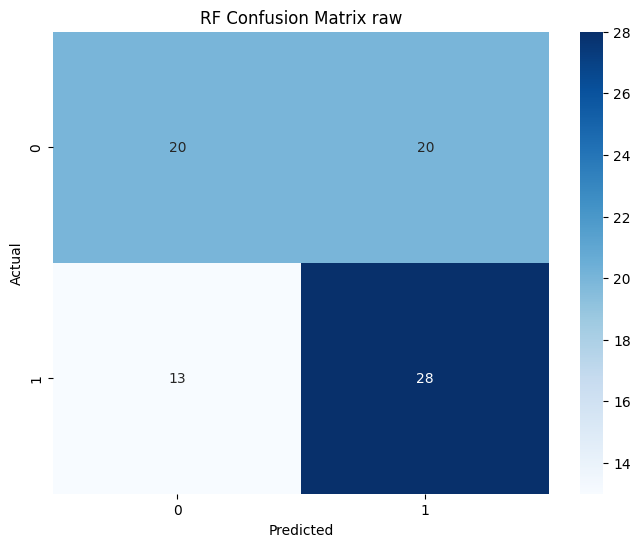

In [167]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, SVM_y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix raw')
plt.show()

## Wider AE

In [65]:
class Wider_AE(AE):
    def train(self):
    # Number of features in your dataset
        n_features = len(self.X_train.columns) 


        input_layer = Input(shape=(n_features,))
        encoder = Dense(256, activation='relu')(input_layer)

        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(64, activation='relu')(encoder)


        bottleneck = Dense(self.bottleneck, activation='relu')(encoder)  

        # Define the decoder (mirror the encoder)
        decoder = Dense(64, activation='relu')(bottleneck)
        decoder = Dense(128, activation='relu')(decoder)
        decoder = Dense(256, activation='relu')(decoder)

        self.encoder= Model(inputs=input_layer, outputs=bottleneck)

        # Output layer
        output_layer = Dense(n_features, activation='sigmoid')(decoder) 

        # Define the autoencoder model
        self.autoencoder = Model(inputs=input_layer, outputs=output_layer)

        # Compile the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')

        self.checkpoint = ModelCheckpoint(f'model/{self.type}_best_model.keras', 
                             monitor='val_loss', 
                             verbose=1,           
                             save_best_only=True, 
                             mode='min')         

        self.history = self.autoencoder.fit(self.X_train, self.X_train,
                epochs=100,
                batch_size=8,
                shuffle=True,
                validation_data=(self.X_test, self.X_test),
                callbacks=[self.checkpoint])  
        
        self.encode()
        self.map_y()



        


Epoch 1/100
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0364
Epoch 1: val_loss improved from inf to 0.02239, saving model to model/(569 proteins encode to 12)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0358 - val_loss: 0.0224
Epoch 2/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0234 
Epoch 2: val_loss improved from 0.02239 to 0.02121, saving model to model/(569 proteins encode to 12)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - val_loss: 0.0212
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0208
Epoch 3: val_loss improved from 0.02121 to 0.01827, saving model to model/(569 proteins encode to 12)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226 - val_loss: 0.0183
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0139
Epoch 4: val_loss improved from 0.01827 to 0.01782, saving model to model/(569 proteins encode to 12)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

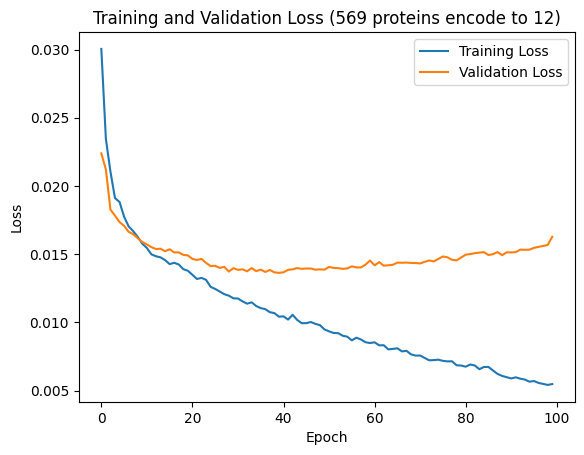

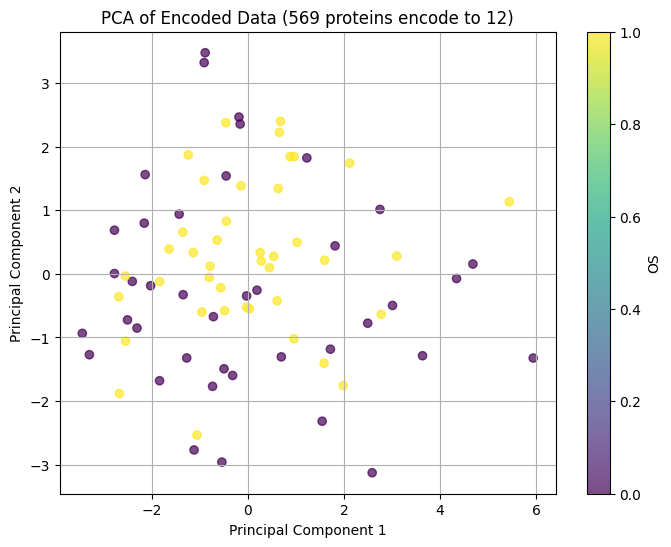

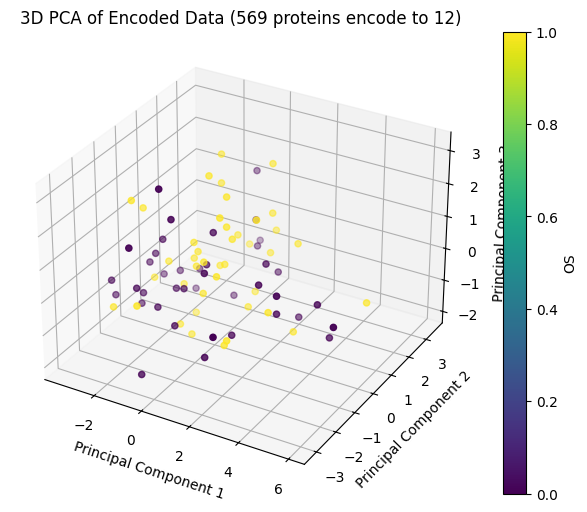

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        40
           1       0.55      0.39      0.46        41

    accuracy                           0.53        81
   macro avg       0.54      0.53      0.52        81
weighted avg       0.54      0.53      0.52        81



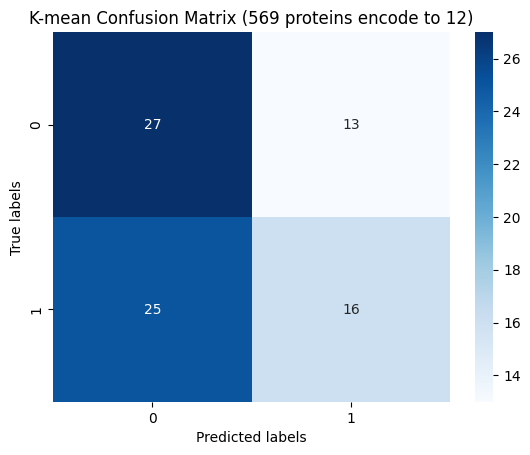

              precision    recall  f1-score   support

           0       0.57      0.60      0.59        40
           1       0.59      0.56      0.57        41

    accuracy                           0.58        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.58      0.58      0.58        81



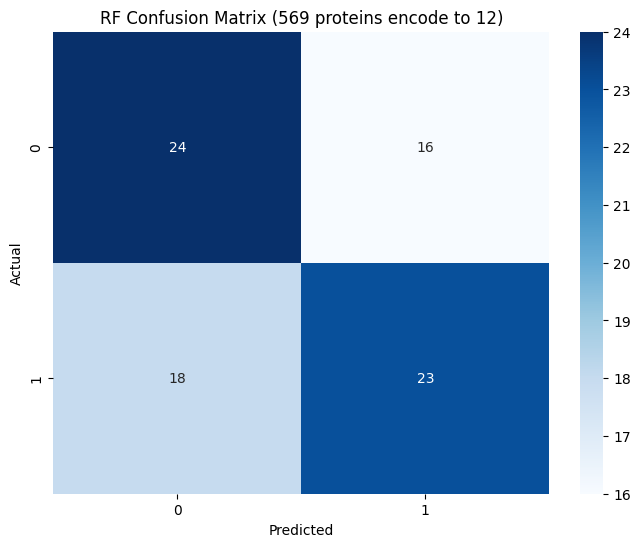

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.59      0.63      0.61        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



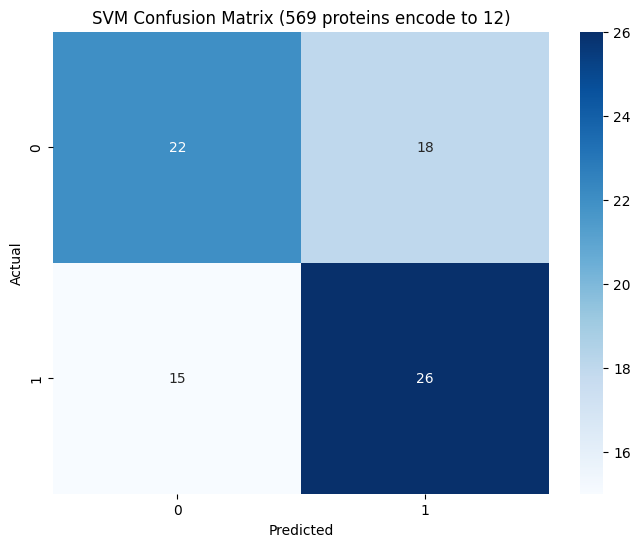

In [72]:
WAE_inputation_12d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 12,type = "(569 proteins encode to 12)")
WAE_inputation_12d.train()
WAE_inputation_12d.plot()
WAE_inputation_12d.do_PCA(2)
WAE_inputation_12d.do_PCA(3)
WAE_inputation_12d.do_Kmean()
WAE_inputation_12d.do_RF(binary=True)
WAE_inputation_12d.do_SVM(binary=True)


In [170]:
WAE_inputation_12d.autoencoder.save("model/WAE_inputation_12d_autoencoder.keras")
WAE_inputation_12d.encoder.save("model/WAE_inputation_12d_encoder.keras")

Epoch 1/100
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0394
Epoch 1: val_loss improved from inf to 0.02231, saving model to model/(569 proteins encode to 24)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0381 - val_loss: 0.0223
Epoch 2/100
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239 
Epoch 2: val_loss improved from 0.02231 to 0.02115, saving model to model/(569 proteins encode to 24)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - val_loss: 0.0212
Epoch 3/100
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213
Epoch 3: val_loss improved from 0.02115 to 0.01833, saving model to model/(569 proteins encode to 24)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - val_loss: 0.0183
Epoch 4/100
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199  
Epoch 4: val_loss improved from 0.01833 to 0.01783, saving model to model/(569 proteins encode to 24)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

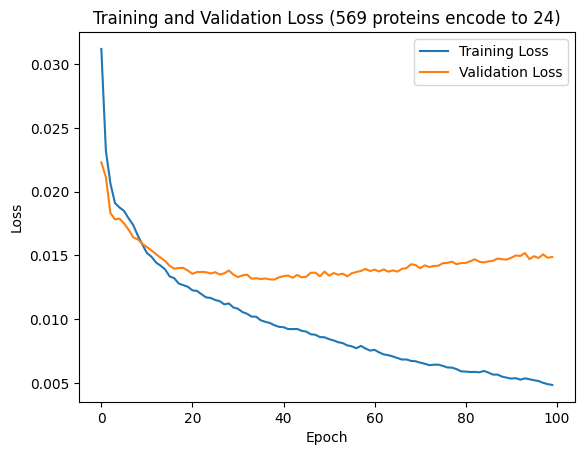

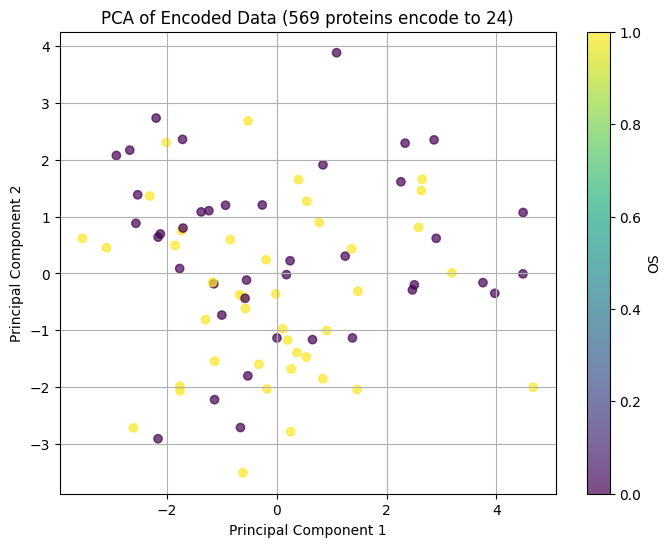

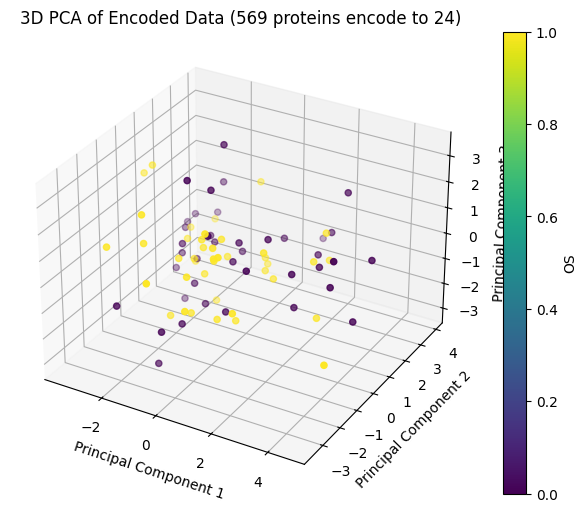

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54        40
           1       0.42      0.24      0.31        41

    accuracy                           0.44        81
   macro avg       0.44      0.45      0.42        81
weighted avg       0.44      0.44      0.42        81



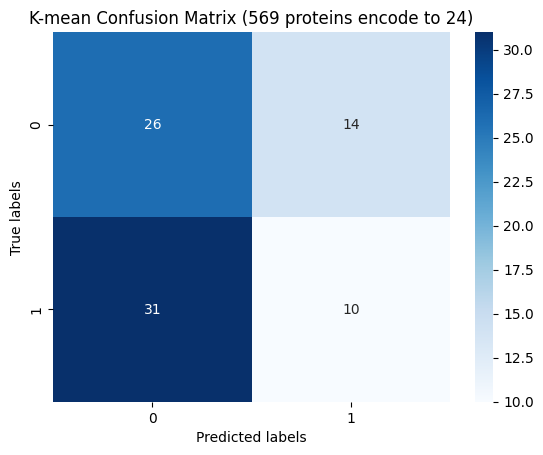

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        40
           1       0.58      0.61      0.60        41

    accuracy                           0.58        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.58      0.58      0.58        81



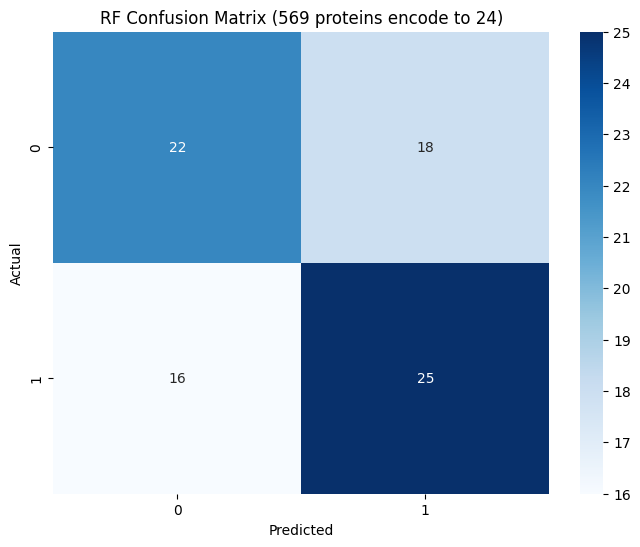

              precision    recall  f1-score   support

           0       0.62      0.57      0.60        40
           1       0.61      0.66      0.64        41

    accuracy                           0.62        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.62      0.62      0.62        81



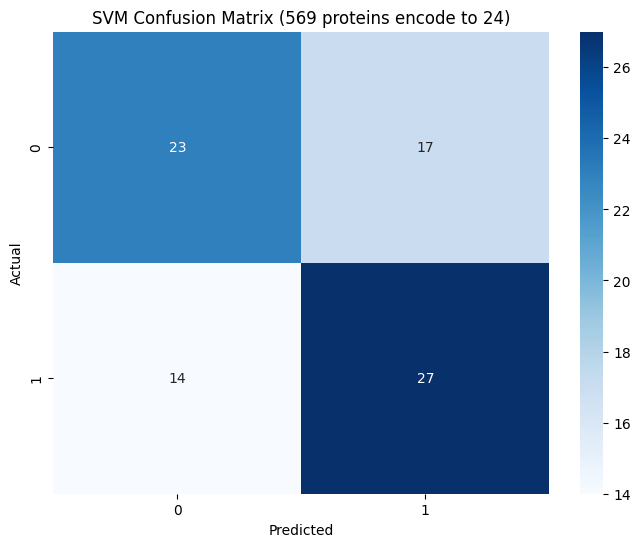

In [71]:
WAE_inputation_24d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 24,type = "(569 proteins encode to 24)")
WAE_inputation_24d.train()
WAE_inputation_24d.plot()
WAE_inputation_24d.do_PCA(2)
WAE_inputation_24d.do_PCA(3)
WAE_inputation_24d.do_Kmean()
WAE_inputation_24d.do_RF(binary=True)
WAE_inputation_24d.do_SVM(binary=True)


Epoch 1/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390
Epoch 1: val_loss improved from inf to 0.02214, saving model to model/(569 proteins encode to 28)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0385 - val_loss: 0.0221
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0293
Epoch 2: val_loss improved from 0.02214 to 0.01923, saving model to model/(569 proteins encode to 28)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - val_loss: 0.0192
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0219
Epoch 3: val_loss improved from 0.01923 to 0.01785, saving model to model/(569 proteins encode to 28)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 - val_loss: 0.0178
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0173
Epoch 4: val_loss did not improve from 0.01785
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 5/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s

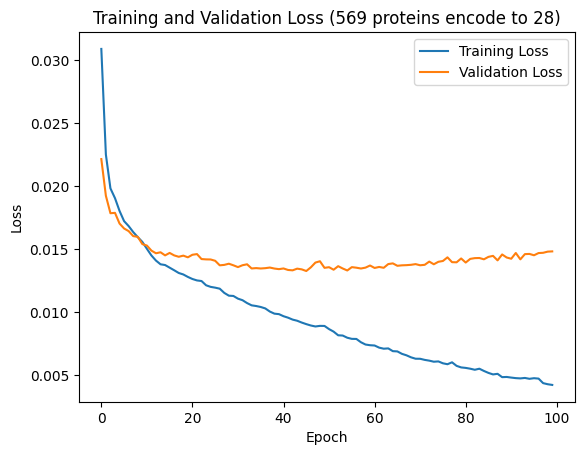

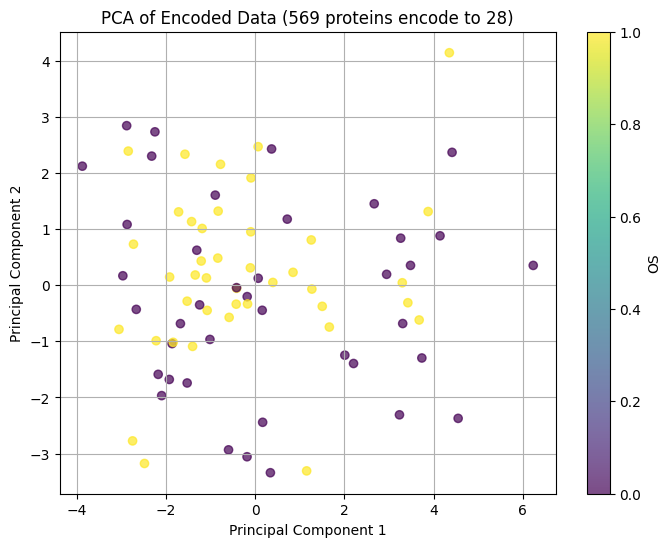

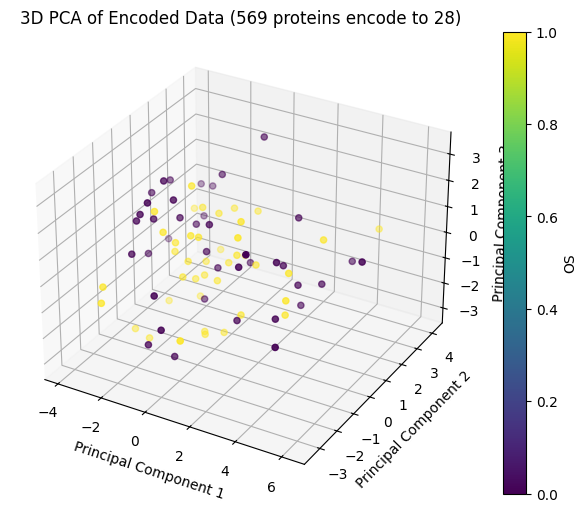

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.68      0.56        40
           1       0.46      0.27      0.34        41

    accuracy                           0.47        81
   macro avg       0.47      0.47      0.45        81
weighted avg       0.47      0.47      0.45        81



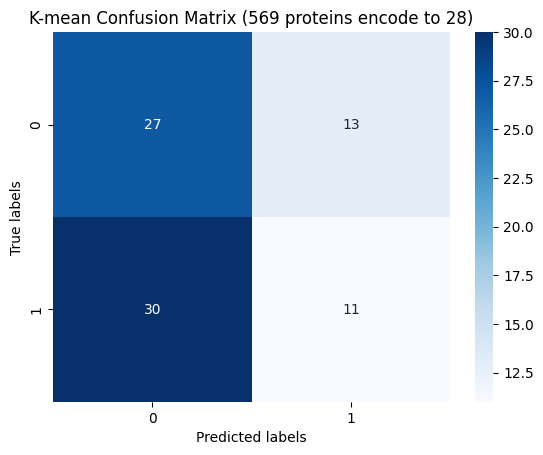

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        40
           1       0.54      0.54      0.54        41

    accuracy                           0.53        81
   macro avg       0.53      0.53      0.53        81
weighted avg       0.53      0.53      0.53        81



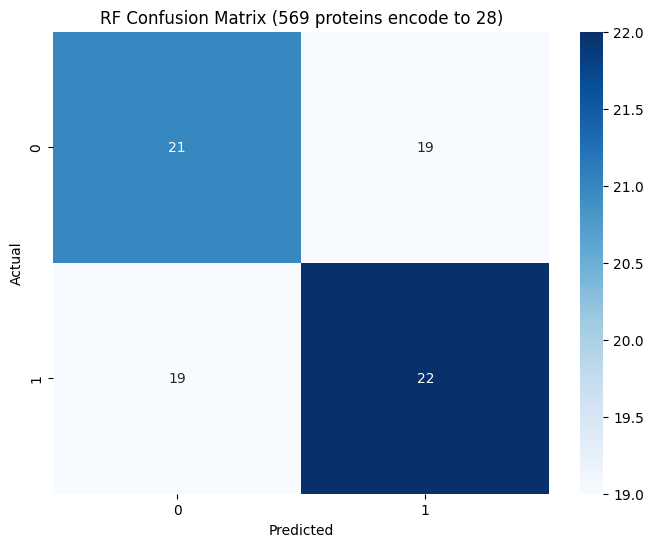

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.59      0.63      0.61        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



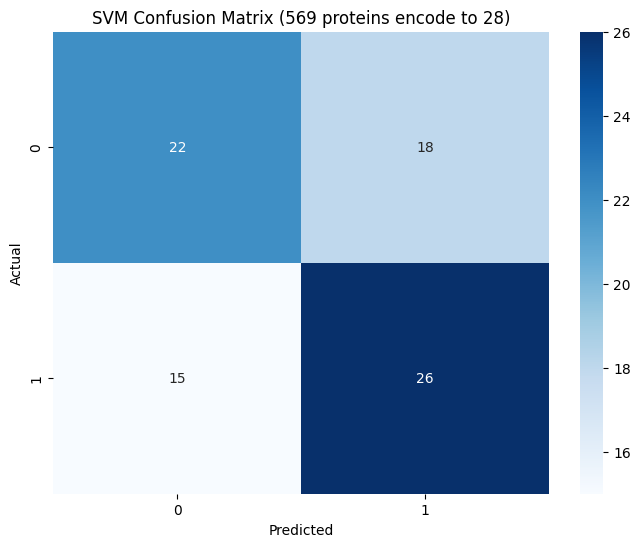

In [74]:
WAE_inputation_28d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 28,type = "(569 proteins encode to 28)")
WAE_inputation_28d.train()
WAE_inputation_28d.plot()
WAE_inputation_28d.do_PCA(2)
WAE_inputation_28d.do_PCA(3)
WAE_inputation_28d.do_Kmean()
WAE_inputation_28d.do_RF(binary=True)
WAE_inputation_28d.do_SVM(binary=True)


# Top Record

Epoch 1/100


29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376
Epoch 1: val_loss improved from inf to 0.02225, saving model to model/(569 proteins encode to 18)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - val_loss: 0.0223
Epoch 2/100
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0236 
Epoch 2: val_loss improved from 0.02225 to 0.02126, saving model to model/(569 proteins encode to 18)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - val_loss: 0.0213
Epoch 3/100
22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220 
Epoch 3: val_loss improved from 0.02126 to 0.01839, saving model to model/(569 proteins encode to 18)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - val_loss: 0.0184
Epoch 4/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185  
Epoch 4: val_loss improved from 0.01839 to 0.01782, saving model to model/(569 proteins encode to 18)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186

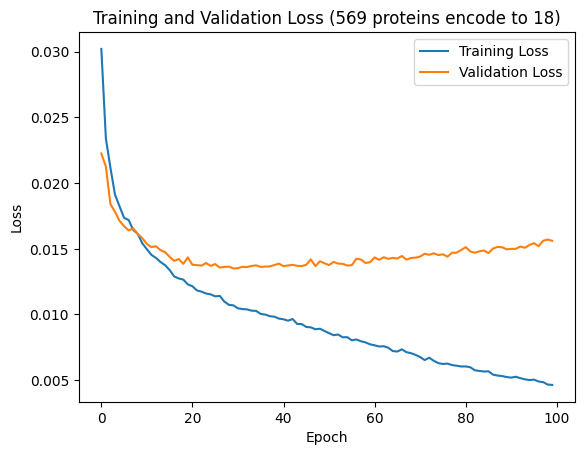

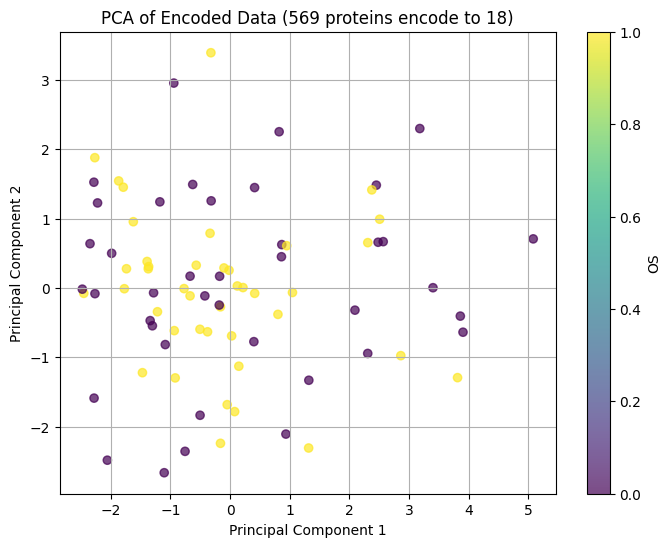

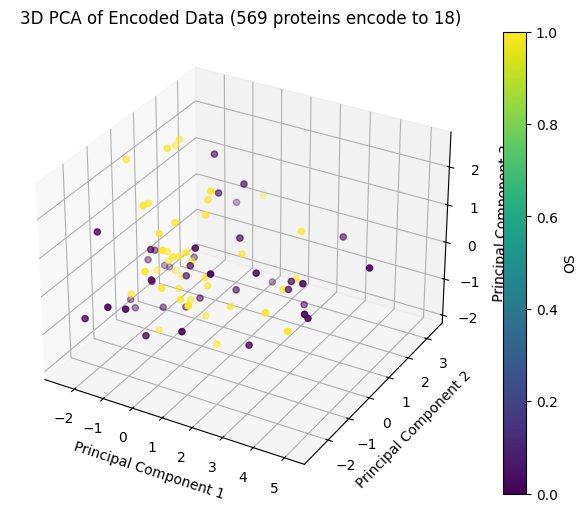

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        40
           1       0.42      0.20      0.27        41

    accuracy                           0.46        81
   macro avg       0.44      0.46      0.42        81
weighted avg       0.44      0.46      0.42        81



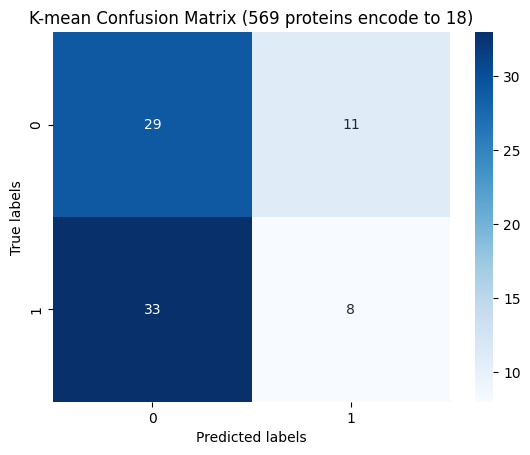

              precision    recall  f1-score   support

           0       0.47      0.42      0.45        40
           1       0.49      0.54      0.51        41

    accuracy                           0.48        81
   macro avg       0.48      0.48      0.48        81
weighted avg       0.48      0.48      0.48        81



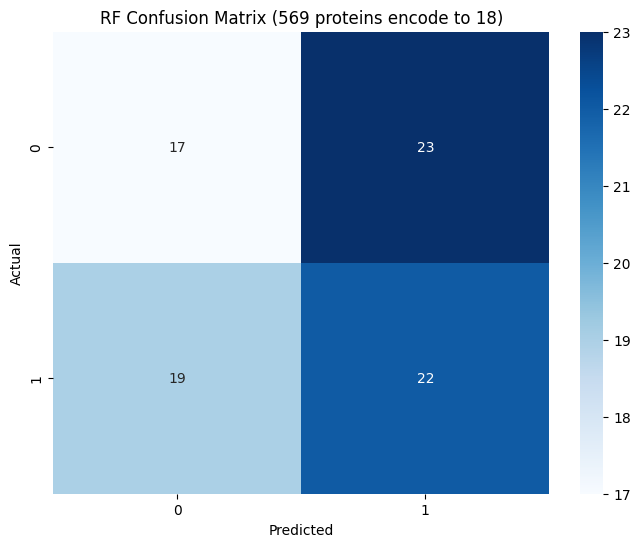

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.72      0.76      0.74        41

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



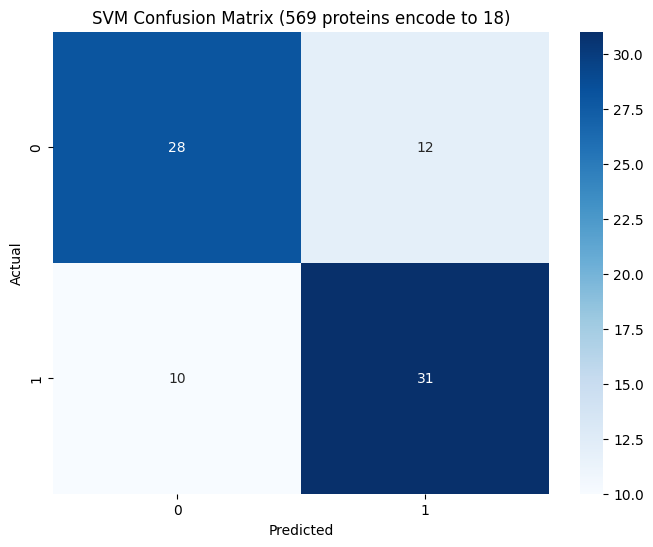

In [76]:
WAE_inputation_30d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 18,type = "(569 proteins encode to 18)")
WAE_inputation_30d.train()
WAE_inputation_30d.plot()
WAE_inputation_30d.do_PCA(2)
WAE_inputation_30d.do_PCA(3)
WAE_inputation_30d.do_Kmean()
WAE_inputation_30d.do_RF(binary=True)
WAE_inputation_30d.do_SVM(binary=True)


In [77]:
WAE_inputation_30d.autoencoder.save("model/WAE_inputation_18d_autoencoder.keras")
WAE_inputation_30d.encoder.save("model/WAE_inputation_18d_encoder.keras")

# AE 32

Epoch 1/100


30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0369
Epoch 1: val_loss improved from inf to 0.02264, saving model to model/(569 proteins encode to 32)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - val_loss: 0.0226
Epoch 2/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 
Epoch 2: val_loss improved from 0.02264 to 0.02148, saving model to model/(569 proteins encode to 32)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 3/100
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220 
Epoch 3: val_loss improved from 0.02148 to 0.01854, saving model to model/(569 proteins encode to 32)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - val_loss: 0.0185
Epoch 4/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188  
Epoch 4: val_loss improved from 0.01854 to 0.01788, saving model to model/(569 proteins encode to 32)_best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188

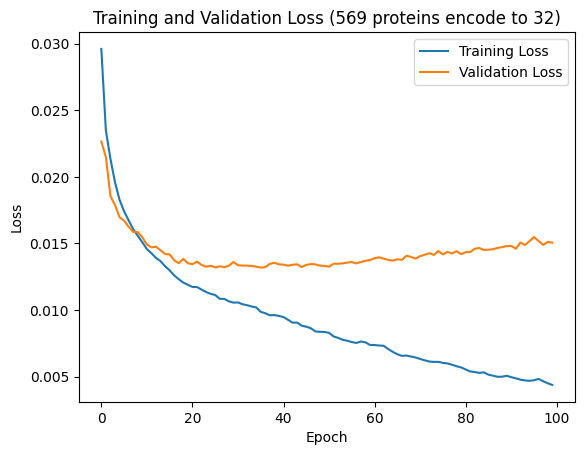

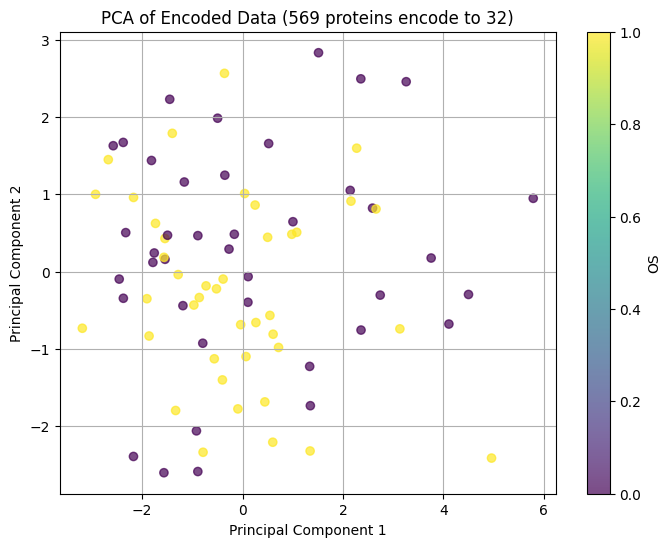

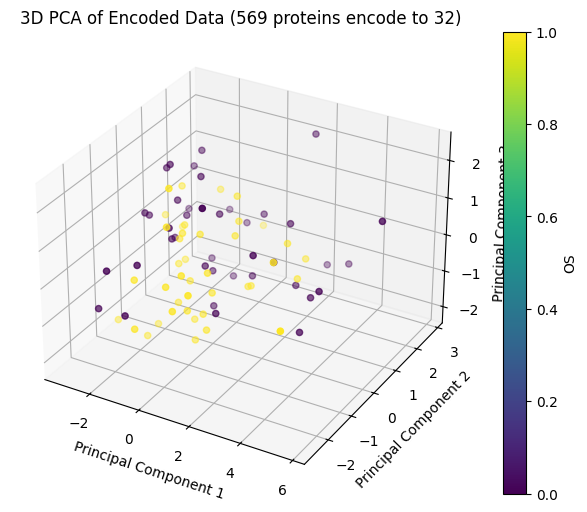

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.65      0.53        40
           1       0.36      0.20      0.25        41

    accuracy                           0.42        81
   macro avg       0.40      0.42      0.39        81
weighted avg       0.40      0.42      0.39        81



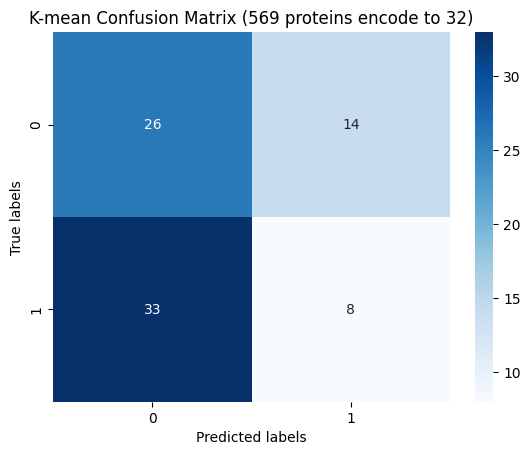

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        40
           1       0.58      0.61      0.60        41

    accuracy                           0.58        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.58      0.58      0.58        81



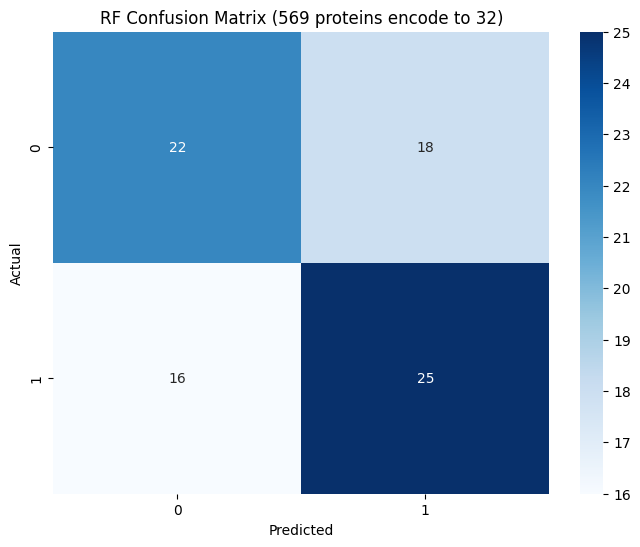

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        40
           1       0.60      0.66      0.63        41

    accuracy                           0.60        81
   macro avg       0.61      0.60      0.60        81
weighted avg       0.61      0.60      0.60        81



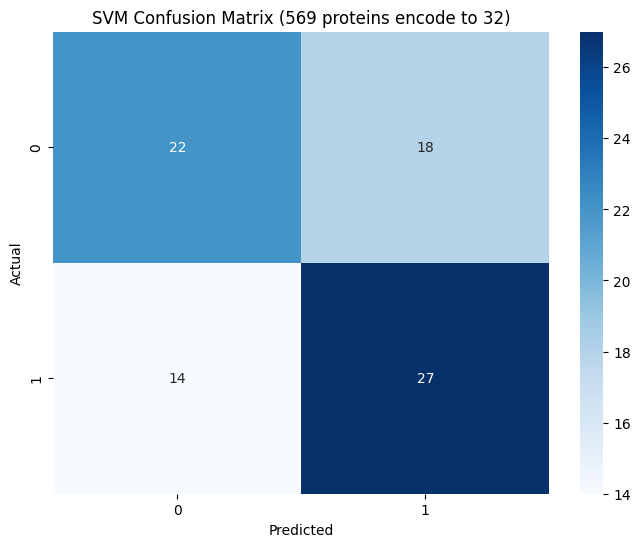

In [73]:
WAE_inputation_32d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 32,type = "(569 proteins encode to 32)")
WAE_inputation_32d.train()
WAE_inputation_32d.plot()
WAE_inputation_32d.do_PCA(2)
WAE_inputation_32d.do_PCA(3)
WAE_inputation_32d.do_Kmean()
WAE_inputation_32d.do_RF(binary=True)
WAE_inputation_32d.do_SVM(binary=True)


In [173]:
WAE_inputation_32d.autoencoder.save("model/WAE_inputation_32d_autoencoder.keras")
WAE_inputation_32d.encoder.save("model/WAE_inputation_32d_encoder.keras")

In [174]:
import joblib

joblib.dump(WAE_inputation_32d.classifer, 'WAE_inputation_32d_svm_model.pkl')


['WAE_inputation_32d_svm_model.pkl']

Epoch 1/100
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374
Epoch 1: val_loss improved from inf to 0.02252, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - val_loss: 0.0225
Epoch 2/100
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 
Epoch 2: val_loss improved from 0.02252 to 0.01977, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - val_loss: 0.0198
Epoch 3/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178
Epoch 3: val_loss improved from 0.01977 to 0.01829, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - val_loss: 0.0183
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0170
Epoch 4: val_loss improved from 0.01829 to 0.01775, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 5/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 
Epoch 5: val_l

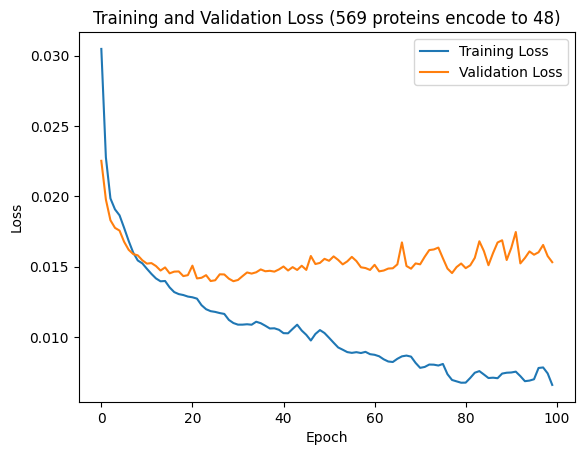

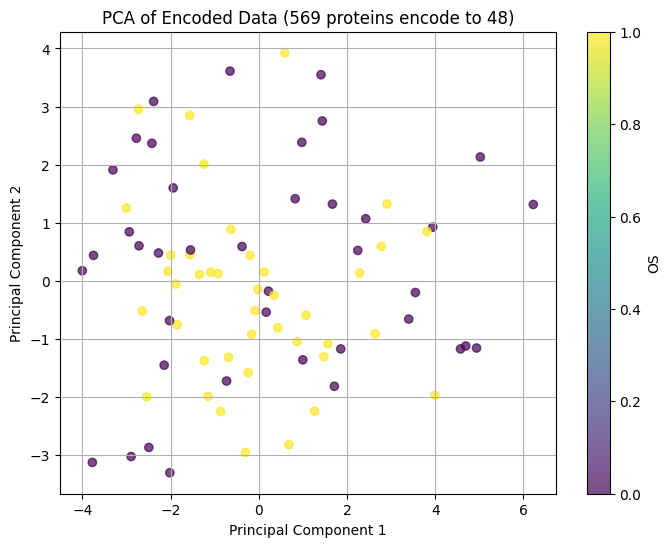

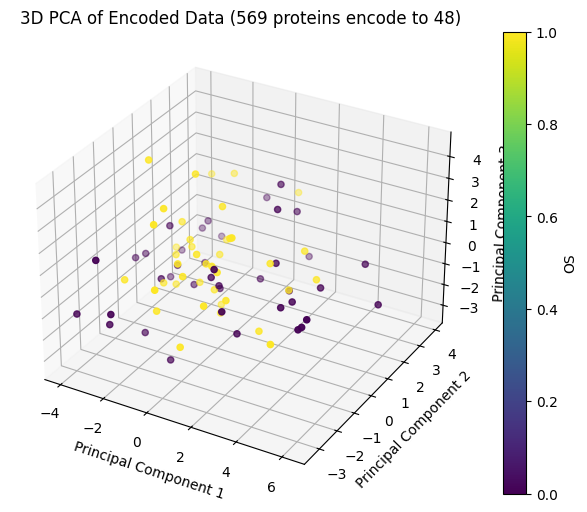

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.48        40
           1       0.44      0.37      0.40        41

    accuracy                           0.44        81
   macro avg       0.44      0.45      0.44        81
weighted avg       0.44      0.44      0.44        81



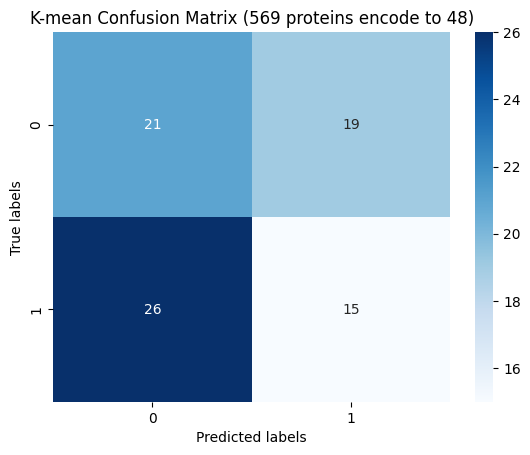

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        40
           1       0.50      0.51      0.51        41

    accuracy                           0.49        81
   macro avg       0.49      0.49      0.49        81
weighted avg       0.49      0.49      0.49        81



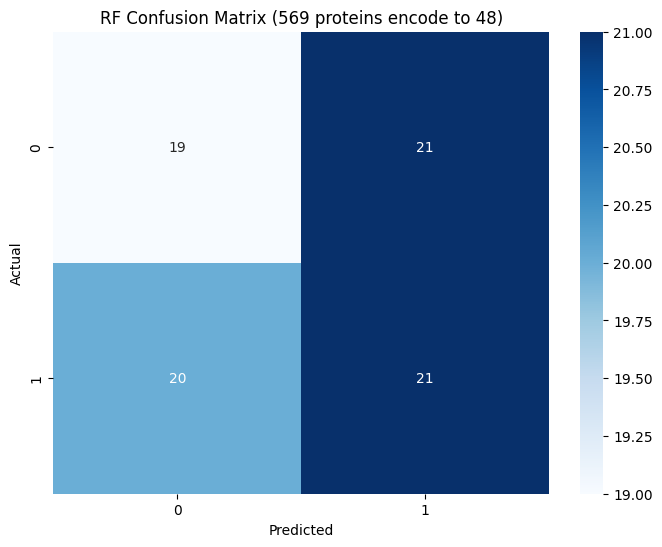

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        40
           1       0.57      0.61      0.59        41

    accuracy                           0.57        81
   macro avg       0.57      0.57      0.57        81
weighted avg       0.57      0.57      0.57        81



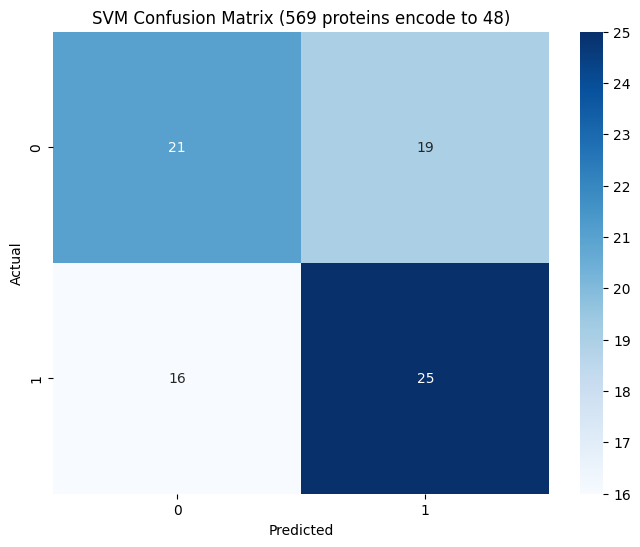

In [175]:
WAE_inputation_48d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 48,type = "(569 proteins encode to 48)")
WAE_inputation_48d.train()
WAE_inputation_48d.plot()
WAE_inputation_48d.do_PCA(2)
WAE_inputation_48d.do_PCA(3)
WAE_inputation_48d.do_Kmean()
WAE_inputation_48d.do_RF(binary=True)
WAE_inputation_48d.do_SVM(binary=True)


Epoch 1/100


29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0372
Epoch 1: val_loss improved from inf to 0.02230, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0365 - val_loss: 0.0223
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 
Epoch 2: val_loss improved from 0.02230 to 0.01999, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - val_loss: 0.0200
Epoch 3/100
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 
Epoch 3: val_loss improved from 0.01999 to 0.01806, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - val_loss: 0.0181
Epoch 4/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169
Epoch 4: val_loss improved from 0.01806 to 0.01780, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 5/100
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 
Epoch 5: val_loss did not 

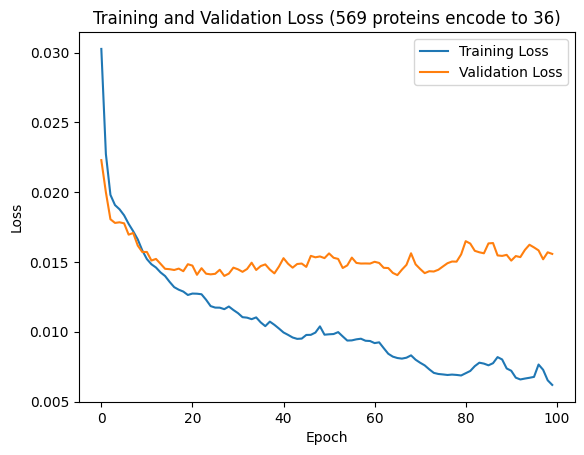

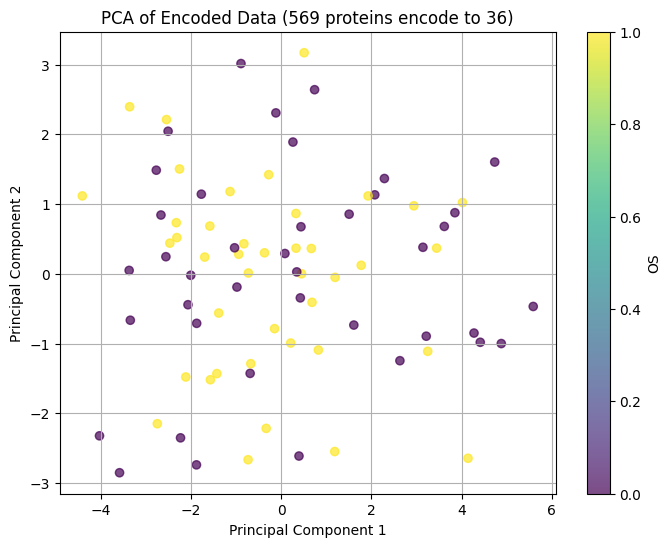

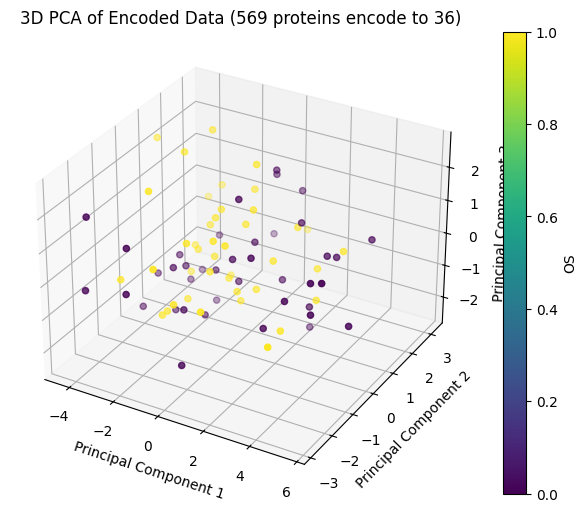

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.65      0.53        40
           1       0.39      0.22      0.28        41

    accuracy                           0.43        81
   macro avg       0.42      0.43      0.41        81
weighted avg       0.42      0.43      0.40        81



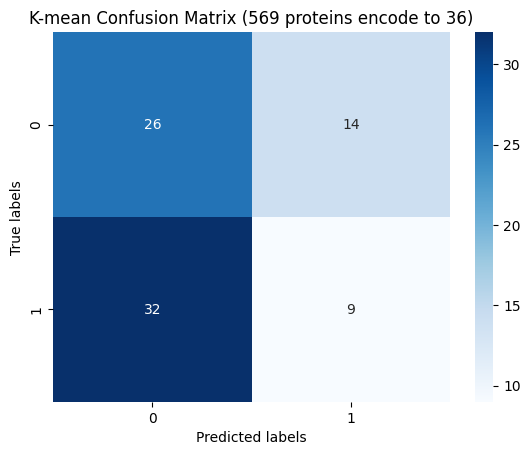

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        40
           1       0.54      0.54      0.54        41

    accuracy                           0.53        81
   macro avg       0.53      0.53      0.53        81
weighted avg       0.53      0.53      0.53        81



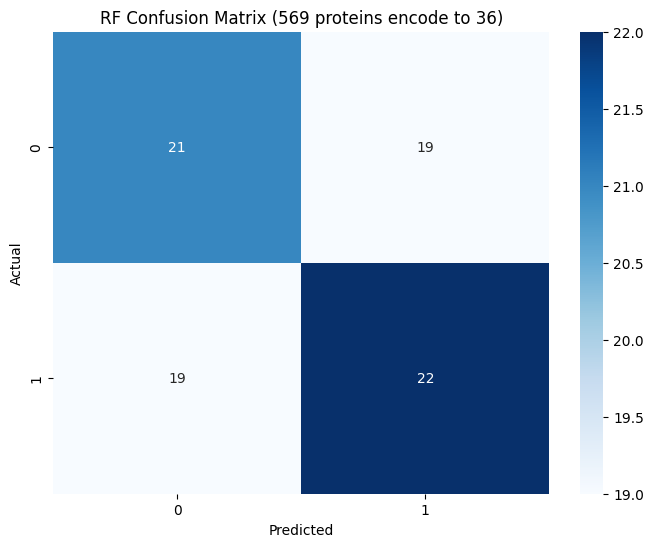

              precision    recall  f1-score   support

           0       0.54      0.53      0.53        40
           1       0.55      0.56      0.55        41

    accuracy                           0.54        81
   macro avg       0.54      0.54      0.54        81
weighted avg       0.54      0.54      0.54        81



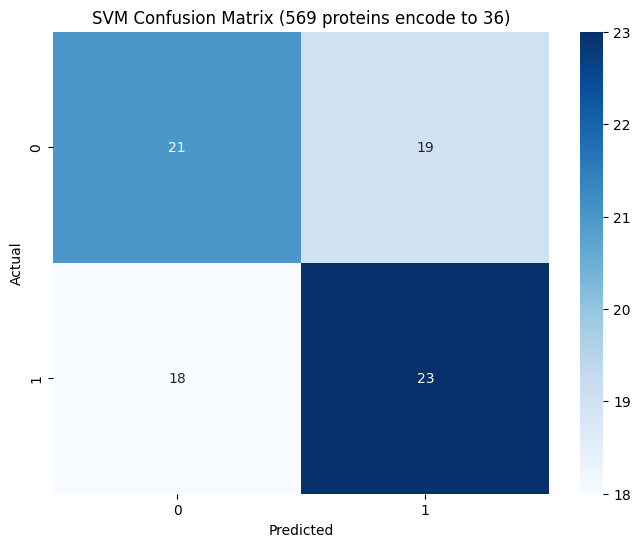

In [176]:
WAE_inputation_36d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 36,type = "(569 proteins encode to 36)")
WAE_inputation_36d.train()
WAE_inputation_36d.plot()
WAE_inputation_36d.do_PCA(2)
WAE_inputation_36d.do_PCA(3)
WAE_inputation_36d.do_Kmean()
WAE_inputation_36d.do_RF(binary=True)
WAE_inputation_36d.do_SVM(binary=True)


Epoch 1/100


29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367
Epoch 1: val_loss improved from inf to 0.02220, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0361 - val_loss: 0.0222
Epoch 2/100
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 
Epoch 2: val_loss improved from 0.02220 to 0.02003, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - val_loss: 0.0200
Epoch 3/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 3: val_loss improved from 0.02003 to 0.01823, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - val_loss: 0.0182
Epoch 4/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0184 
Epoch 4: val_loss improved from 0.01823 to 0.01783, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 
Epoch 5: val_loss improved

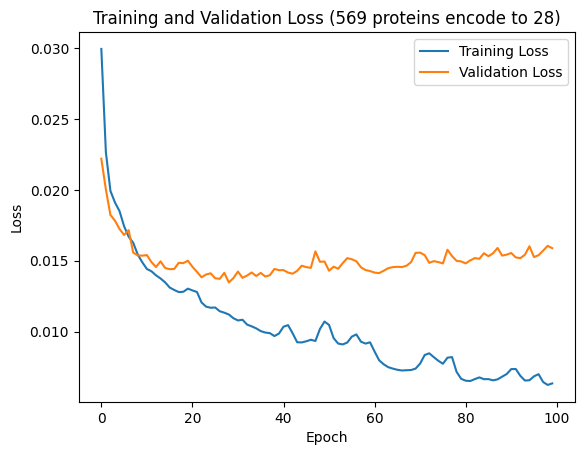

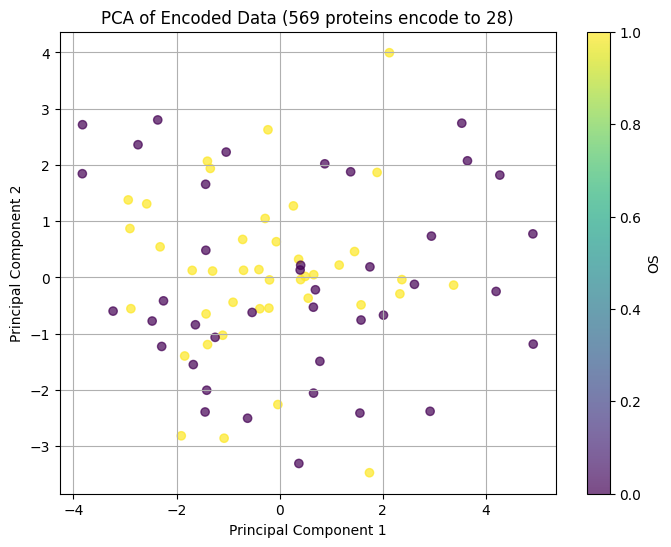

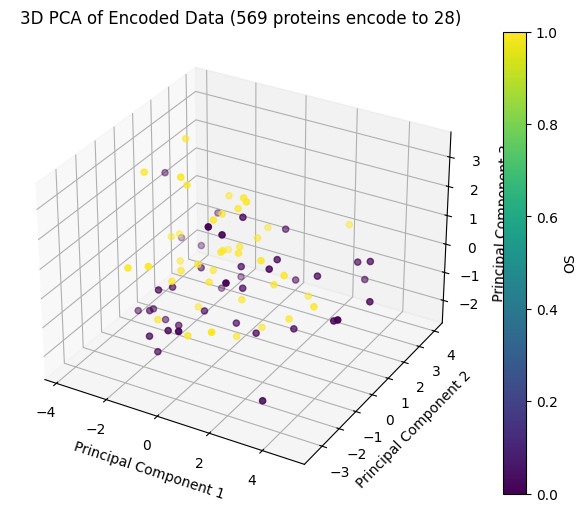

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.47      0.46        40
           1       0.45      0.41      0.43        41

    accuracy                           0.44        81
   macro avg       0.44      0.44      0.44        81
weighted avg       0.44      0.44      0.44        81



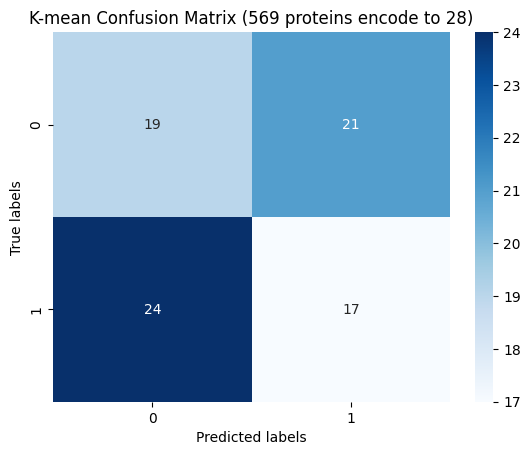

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        40
           1       0.59      0.66      0.62        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



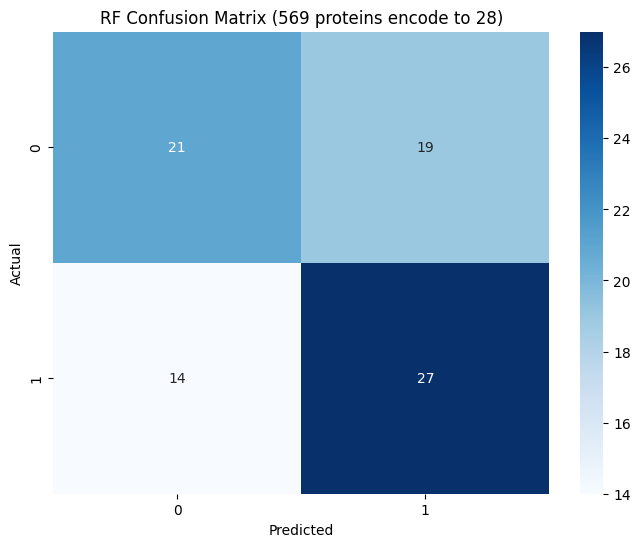

              precision    recall  f1-score   support

           0       0.64      0.57      0.61        40
           1       0.62      0.68      0.65        41

    accuracy                           0.63        81
   macro avg       0.63      0.63      0.63        81
weighted avg       0.63      0.63      0.63        81



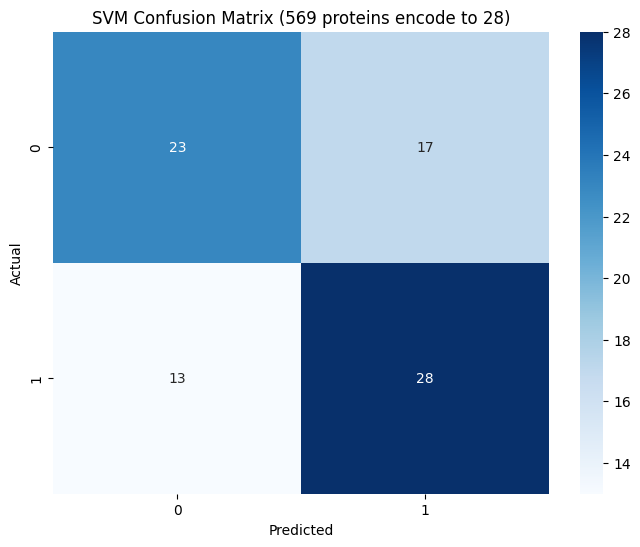

In [177]:
WAE_inputation_28d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 28,type = "(569 proteins encode to 28)")
WAE_inputation_28d.train()
WAE_inputation_28d.plot()
WAE_inputation_28d.do_PCA(2)
WAE_inputation_28d.do_PCA(3)
WAE_inputation_28d.do_Kmean()
WAE_inputation_28d.do_RF(binary=True)
WAE_inputation_28d.do_SVM(binary=True)


In [178]:
WAE_inputation_32d

Epoch 1/100
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373
Epoch 1: val_loss improved from inf to 0.02237, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0366 - val_loss: 0.0224
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224
Epoch 2: val_loss improved from 0.02237 to 0.02131, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - val_loss: 0.0213
Epoch 3/100
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211 
Epoch 3: val_loss improved from 0.02131 to 0.01864, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - val_loss: 0.0186
Epoch 4/100
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 
Epoch 4: val_loss improved from 0.01864 to 0.01830, saving model to model/best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 5/100
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 
Epoch 5: val_lo

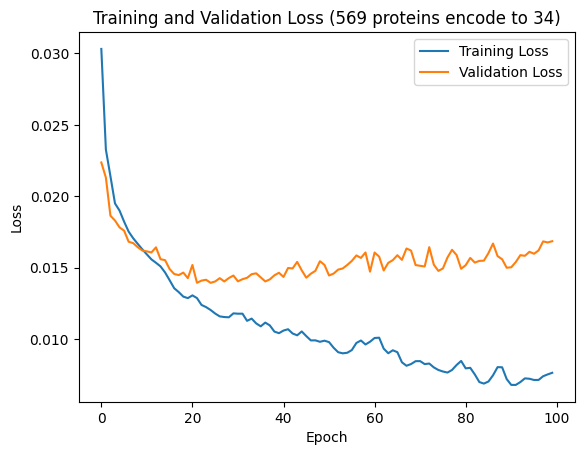

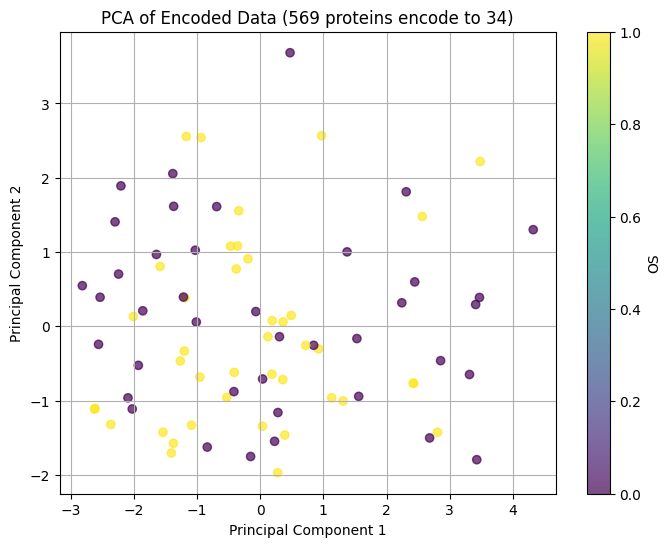

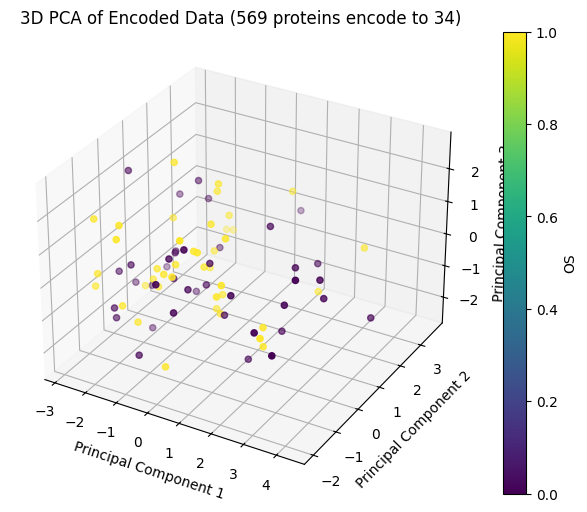

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54        40
           1       0.42      0.24      0.31        41

    accuracy                           0.44        81
   macro avg       0.44      0.45      0.42        81
weighted avg       0.44      0.44      0.42        81



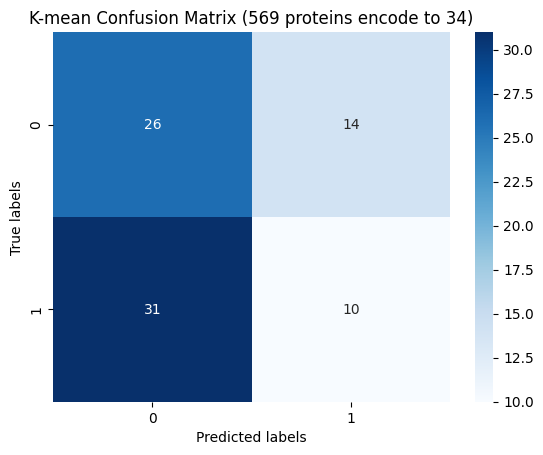

              precision    recall  f1-score   support

           0       0.51      0.50      0.51        40
           1       0.52      0.54      0.53        41

    accuracy                           0.52        81
   macro avg       0.52      0.52      0.52        81
weighted avg       0.52      0.52      0.52        81



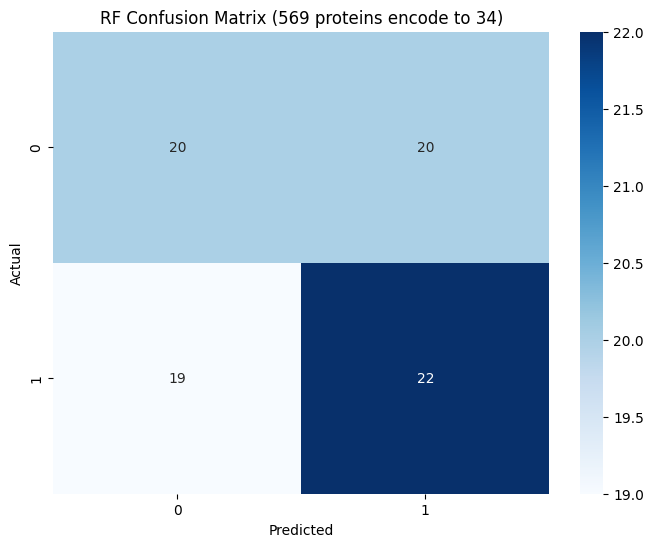

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.59      0.63      0.61        41

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



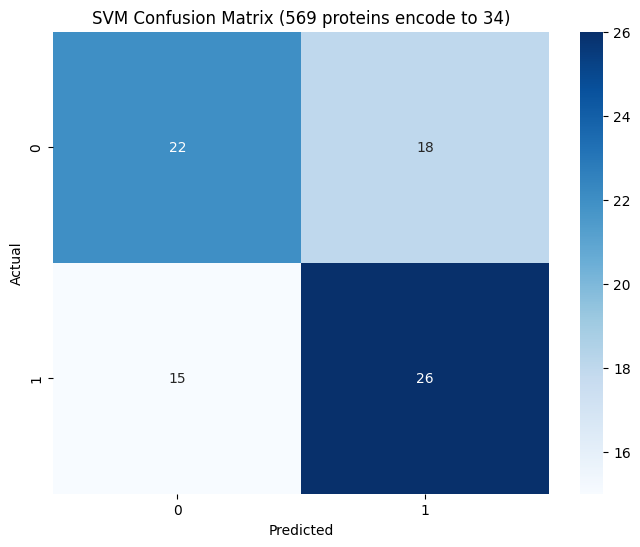

In [179]:
WAE_inputation_34d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 34,type = "(569 proteins encode to 34)")
WAE_inputation_34d.train()
WAE_inputation_34d.plot()
WAE_inputation_34d.do_PCA(2)
WAE_inputation_34d.do_PCA(3)
WAE_inputation_34d.do_Kmean()
WAE_inputation_34d.do_RF(binary=True)
WAE_inputation_34d.do_SVM(binary=True)


## Test paper result

Try signature:BAK	LKB1	PAXILLIN	PEA15	SMAD4	XRCC1	CYCLINE2	PEA15_pS116	PRDX1	BRAF_pS445	IRF1
"AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449"，“AGID00125”，“AGID00492”，“AGID00014”，“AGID00223”
https://www.sciencedirect.com/science/article/pii/S0009898120302862

In [180]:
ps = ["AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449","AGID00125","AGID00492","AGID00014","AGID00223"]
key_protein = merged_df[ps]
os = merged_df["days_to_death"]
os = os.map(AE.map_years_to_group).map(AE.map_to_binary)

other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(key_protein, os,
                                                    train_size=0.75,
                                                    random_state=1)

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        40
           1       0.57      0.78      0.66        41

    accuracy                           0.59        81
   macro avg       0.61      0.59      0.58        81
weighted avg       0.61      0.59      0.58        81



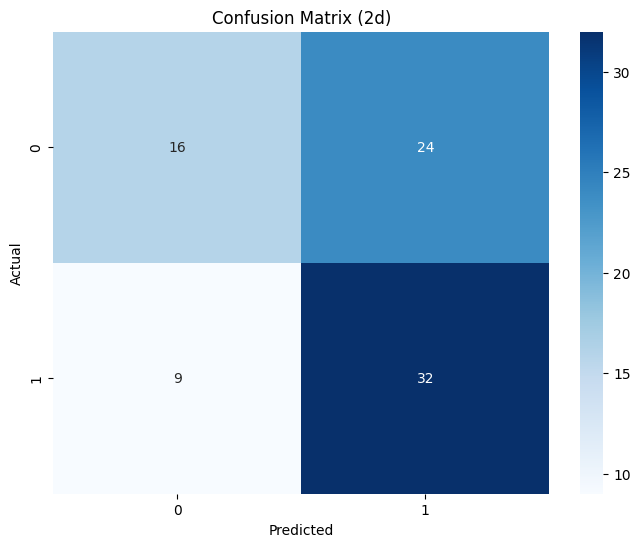

In [181]:
SVM_X_train = X_train
SVM_X_test = X_test

SVM_y_train = y_train
SVM_y_test = y_test
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=0)

# Train the classifier
svm_classifier.fit(SVM_X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(SVM_X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2d)')
plt.show()


# leader Board

Raw SVM:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59        40
           1       0.59      0.56      0.57        41

    accuracy                           0.58        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.58      0.58      0.58        81

Paper SVM:

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        40
           1       0.57      0.78      0.66        41

    accuracy                           0.59        81
   macro avg       0.61      0.59      0.58        81
weighted avg       0.61      0.59      0.58        81

AE: 12
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        40
           1       0.65      0.73      0.69        41

    accuracy                           0.67        81
   macro avg       0.67      0.67      0.66        81
weighted avg       0.67      0.67      0.67        81

WAE: 12
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        40
           1       0.62      0.61      0.62        41

    accuracy                           0.62        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.62      0.62      0.62        81

WAE: 18
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.72      0.76      0.74        41

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



# Kaplan-Meier curve and log rank test

In [78]:
merged_df = pd.read_csv('protein_expression.csv')

In [79]:
def process_patient_data(df):
    # Initialize new columns
    df['lifetime'] = 0
    df['event_observed'] = 0
    
    # Iterate through each row in the DataFrame to update 'lifetime' and 'event_observed'
    for index, row in df.iterrows():
        if row['vital_status'] == 'Alive':
            df.at[index, 'lifetime'] = row['days_to_last_follow_up']
            df.at[index, 'event_observed'] = 0
        elif row['vital_status'] == 'Dead':
            df.at[index, 'lifetime'] = row['days_to_death']
            df.at[index, 'event_observed'] = 1
    
    return df
merged_df = process_patient_data(merged_df)


In [80]:
other_columns = ["days_to_death","case_submitter_id","ajcc_pathologic_stage","vital_status","days_to_last_follow_up","lifetime","event_observed"]

In [81]:
gene_columns = merged_df.columns.drop(other_columns)
other = merged_df.columns.drop("days_to_death")
scaler = MinMaxScaler()
merged_df[gene_columns] = scaler.fit_transform(merged_df[gene_columns])

X_train_KM, X_test_KM, y_train_KM, y_test_KM = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [132]:
# encoder = tf.keras.models.load_model("model/WAE_inputation_32d_encoder.keras")
# classifier = joblib.load('model/WAE_inputation_32d_svm_model.pkl')


In [82]:
encoded_X_test_KM = WAE_inputation_30d.encoder.predict(X_test_KM[gene_columns])
y_test_KM_bin = y_test_KM.map(AE.map_years_to_group).map(AE.map_to_binary)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


              precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.72      0.76      0.74        41

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



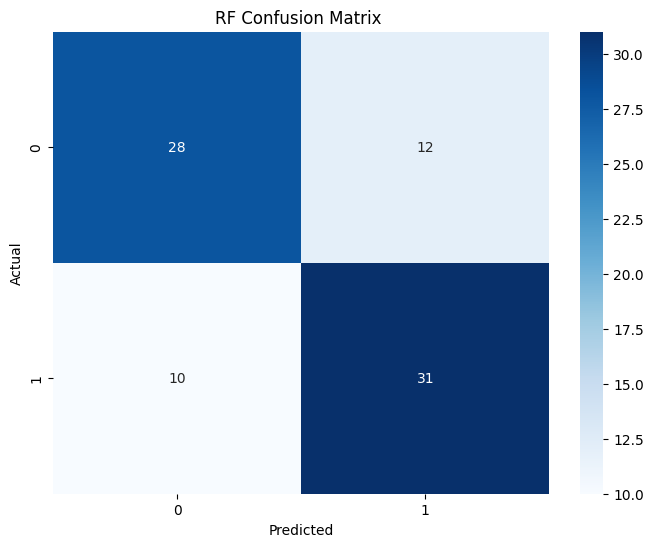

In [83]:
y_pred = WAE_inputation_30d.classifer.predict(encoded_X_test_KM)
cm = confusion_matrix(y_test_KM_bin, y_pred)
print(classification_report(y_test_KM_bin, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(y_test_KM_bin))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix ')
plt.show()


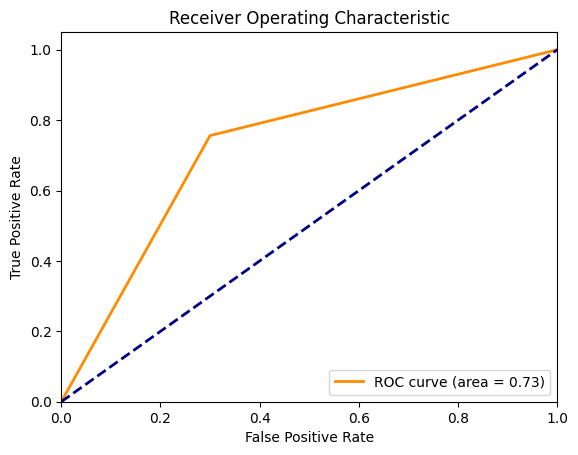

In [93]:

from sklearn.metrics import roc_curve, auc

# Assuming y_test contains your true labels and y_scores contains the probability estimates of the positive class
y_test_roc = y_test_KM_bin  # Replace with your actual data
y_scores_roc = y_pred  # Replace with your actual data

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_roc, y_scores_roc)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [89]:
import pickle

with open('18d_rf_classifier.pkl', 'wb') as model_pkl:
    pickle.dump(WAE_inputation_30d.classifer, model_pkl, protocol=pickle.HIGHEST_PROTOCOL)

from joblib import dump
dump(WAE_inputation_30d.classifer, '18d_rf_classifier.joblib')


['18d_rf_classifier.joblib']

In [84]:
X_test_KM["risk_group"] = y_pred

/tmp/ipykernel_1859/3069503698.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_KM["risk_group"] = y_pred


In [85]:
X_test_KM.to_csv("prediction.csv",index=False)

In [86]:
X_test_KM=pd.read_csv("prediction.csv")

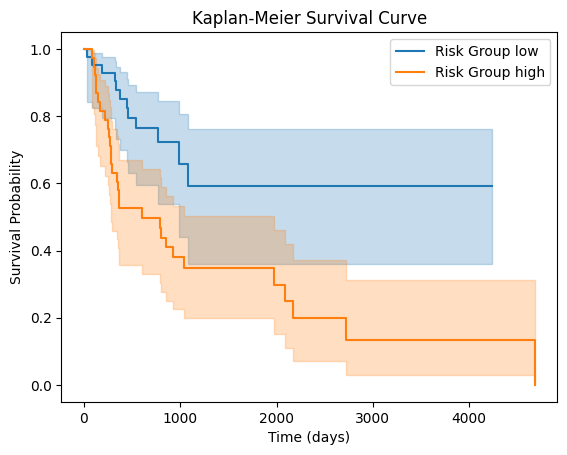

In [87]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
for group in X_test_KM['risk_group'].unique():
    # Selecting data for the group
    risk = ["high", "low"][group]
    group_data = X_test_KM[X_test_KM['risk_group'] == group]
    
    # Fitting the model
    kmf.fit(durations=group_data['lifetime'], event_observed=group_data['event_observed'], label=f'Risk Group {risk}')
    
    # Plotting the survival function
    kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curve')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')

plt.legend()
plt.show()

In [88]:
from lifelines.statistics import logrank_test

# Split the data into two groups
group_A = X_test_KM[X_test_KM['risk_group'] == 0]
group_B = X_test_KM[X_test_KM['risk_group'] == 1]

# Perform the Log Rank Test
results = logrank_test(group_A['lifetime'], group_B['lifetime'], 
                       event_observed_A=group_A['event_observed'], 
                       event_observed_B=group_B['event_observed'])

# Print the results
print('Test statistic (chi-squared):', results.test_statistic)
print('p-value:', results.p_value)

# Interpretation
if results.p_value < 0.05:
    print("There is a statistically significant difference between the two survival curves.")
else:
    print("There is no statistically significant difference between the two survival curves.")


Test statistic (chi-squared): 9.43710467567244
p-value: 0.00212638922180924
There is a statistically significant difference between the two survival curves.
